In [1]:
import os

In [2]:
import pydicom

In [2]:
import matplotlib.pyplot as plt

In [4]:
from scipy import stats

In [3]:
import pandas as pd

In [8]:
path = '/pghbio/dbmi/batmanlab/Data/COPDGene/Images/'
copd_dicom = []
for patient in os.listdir(path):
    for phase in os.listdir(os.path.join(path,patient)):
        dicom_path = os.path.join(path,patient,phase,"DICOM")
        if os.path.exists(dicom_path):
            for dicom in os.listdir(dicom_path):
                if (dicom.find('_INSP_STD_') != -1):
                    copd_dicom.append(os.path.join(dicom_path,dicom))
                    
                    


### Total COPD images

In [7]:
len(copd_dicom)

15482

In [7]:
COPDXRayTubeCurrent = []

COPDExposure = []

COPDPatientAge = []

COPDKVP = []

COPDTableSpeed = []

COPDConvolutionKernel = []

COPDPatientPosition = []

COPDSeriesNumber = []

for i in range(len(copd_dicom)):
    dicom_path = copd_dicom[i]
    dicom_files = os.listdir(dicom_path)
    dicom_file_path = os.path.join(dicom_path, dicom_files[1])

    ds = pydicom.filereader.dcmread(dicom_file_path)

    try:
        COPDXRayTubeCurrent.append(float(ds.XRayTubeCurrent))
    except:
        COPDXRayTubeCurrent.append(None)

    try:
        COPDExposure.append(float(ds.Exposure))
    except:
        COPDExposure.append(None)

    try:
        COPDPatientAge.append(float(ds.PatientAge.replace("Y","")))
    except:
        COPDPatientAge.append(None)

    try:
        COPDKVP.append(float(ds.KVP))
    except:
        COPDKVP.append(None)

    try:
        COPDTableSpeed.append(float(ds.TableSpeed))
    except:
        COPDTableSpeed.append(None)

    try:
        COPDConvolutionKernel.append(ds.ConvolutionKernel)
    except:
        COPDConvolutionKernel.append(None)

    try:
        COPDPatientPosition.append(ds.PatientPosition)
    except:
        COPDPatientPosition.append(None)

    try:
        COPDSeriesNumber.append(int(ds.SeriesNumber))
    except:
        COPDSeriesNumber.append(None)
        

    
    

In [8]:
len(COPDSeriesNumber)

15482

In [9]:
path = '/pghbio/dbmi/batmanlab/Data/UPMC_Lung_Images/SCCOR/CT_Exams/'
sccor_dicom = []
for patient in os.listdir(path):
    for phase in os.listdir(os.path.join(path,patient)):
        dicom_path = os.path.join(path,patient,phase,"002")
        if os.path.exists(dicom_path):
            sccor_dicom.append(dicom_path)
                    
                    

### Total SCCOR images

In [9]:
len(sccor_dicom)

1430

In [11]:

SCCORXRayTubeCurrent = []

SCCORExposure = []

SCCORPatientAge = []

SCCORKVP = []

SCCORTableSpeed = []

SCCORConvolutionKernel = []

SCCORPatientPosition = []

SCCORSeriesNumber = []
for i in range(len(sccor_dicom)):

    dicom_path = sccor_dicom[i]
    dicom_files = os.listdir(dicom_path)
    if len(dicom_files) > 2:
        dicom_file_path = os.path.join(dicom_path, dicom_files[1])
        ds = pydicom.filereader.dcmread(dicom_file_path)

        try:
            SCCORXRayTubeCurrent.append(float(ds.XRayTubeCurrent))
        except:
            SCCORXRayTubeCurrent.append(None)

        try:
            SCCORExposure.append(float(ds.Exposure))
        except:
            SCCORExposure.append(None)

        try:
            SCCORPatientAge.append(float(ds.PatientAge.replace("Y","")))
        except:
            SCCORPatientAge.append(None)

        try:
            SCCORKVP.append(float(ds.KVP))
        except:
            SCCORKVP.append(None)

        try:
            SCCORTableSpeed.append(float(ds.TableSpeed))
        except:
            SCCORTableSpeed.append(None)

        try:
            SCCORConvolutionKernel.append(ds.ConvolutionKernel)
        except:
            SCCORConvolutionKernel.append(None)

        try:
            SCCORPatientPosition.append(ds.PatientPosition)
        except:
            SCCORPatientPosition.append(None)

        try:
            SCCORSeriesNumber.append(int(ds.SeriesNumber))
        except:
            SCCORSeriesNumber.append(None)
    
    

In [12]:
len(SCCORSeriesNumber)

1409

### Comparison between COPD and SCCOR

Text(0.5, 0.98, 'COPD vs SCCOR')

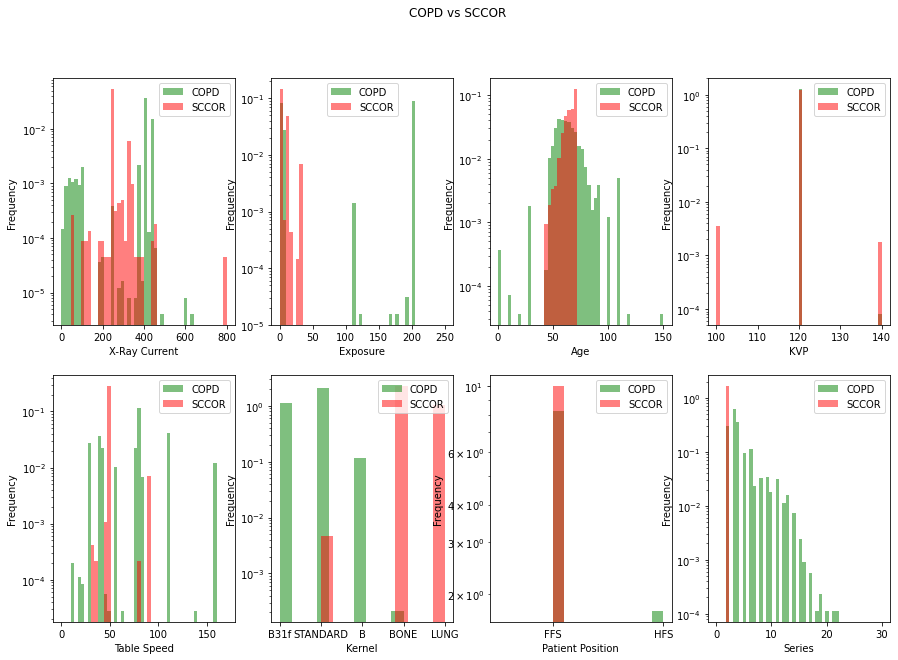

In [31]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4 ,figsize=(15,10))
ax1.hist(list(filter(None, COPDXRayTubeCurrent)), label="COPD", alpha=0.5, color="green", density=True, bins=50, range=(0,800), log=True)
ax1.hist(list(filter(None, SCCORXRayTubeCurrent)), label="SCCOR", alpha=0.5, color="red", density=True, bins=50, range=(0,800), log=True)
ax1.set(xlabel='X-Ray Current', ylabel='Frequency')
ax1.legend()

ax2.hist(list(filter(None, COPDExposure)), label="COPD", alpha=0.5, color="green", density=True, bins=50, range=(0,250), log=True)
ax2.hist(list(filter(None, SCCORExposure)), label="SCCOR", alpha=0.5, color="red", density=True, bins=50, range=(0,250), log=True)
ax2.set(xlabel='Exposure', ylabel='Frequency')
ax2.legend()

ax3.hist(list(filter(None, COPDPatientAge)), label="COPD", alpha=0.5, color="green", density=True, bins=50, range=(0,150), log=True)
ax3.hist(list(filter(None, SCCORPatientAge)), label="SCCOR", alpha=0.5, color="red", density=True, bins=50, range=(0,150), log=True)
ax3.set(xlabel='Age', ylabel='Frequency')
ax3.legend()

ax4.hist(list(filter(None, COPDKVP)), label="COPD", alpha=0.5, color="green", density=True, bins=50, range=(100,140), log=True)
ax4.hist(list(filter(None, SCCORKVP)), label="SCCOR", alpha=0.5, color="red", density=True, bins=50, range=(100,140), log=True)
ax4.set(xlabel='KVP', ylabel='Frequency')
ax4.legend()

ax5.hist(list(filter(None, COPDTableSpeed)), label="COPD", alpha=0.5, color="green", density=True, bins=50, range=(0,170), log=True)
ax5.hist(list(filter(None, SCCORTableSpeed)), label="SCCOR", alpha=0.5, color="red", density=True, bins=50, range=(0,170), log=True)
ax5.set(xlabel='Table Speed', ylabel='Frequency')
ax5.legend()

ax6.hist(list(filter(None, COPDConvolutionKernel)), label="COPD", alpha=0.5, color="green", density=True, log=True)
ax6.hist(list(filter(None, SCCORConvolutionKernel)), label="SCCOR", alpha=0.5, color="red", density=True, log=True)
ax6.set(xlabel='Kernel', ylabel='Frequency')
ax6.legend()

ax7.hist(list(filter(None, COPDPatientPosition)), label="COPD", alpha=0.5, color="green", density=True, log=True)
ax7.hist(list(filter(None, SCCORPatientPosition)), label="SCCOR", alpha=0.5, color="red", density=True, log=True)
ax7.set(xlabel='Patient Position', ylabel='Frequency')
ax7.legend()

ax8.hist(list(filter(None, COPDSeriesNumber)), label="COPD", alpha=0.5, color="green", density=True, bins=50, range=(0,30), log=True)
ax8.hist(list(filter(None, SCCORSeriesNumber)), label="SCCOR", alpha=0.5, color="red", density=True, bins=50, range=(0,30), log=True)
ax8.set(xlabel='Series', ylabel='Frequency')
ax8.legend()

fig.suptitle("COPD vs SCCOR")

### fHOG and Haralick files for COPD

In [10]:
copd_fHOG = []
copd_Haralick = []
for copd_pat in copd_dicom:
    copd_pat = copd_pat.replace("/pghbio/dbmi/batmanlab/Data/COPDGene/Images/","")
    copd_pat_info = copd_pat.split("/")
    if copd_pat_info[1] == "Phase-1":
        copd_fHOG_file = "/pghbio/dbmi/batmanlab/chirayu/Data/COPDGene/Test_Reproducing_Phase-1_Images/" + copd_pat_info[0] + \
        "/" + copd_pat_info[1] + "/SuperVoxels/" + copd_pat_info[3] + "_Iso1.0mm_SuperVoxel_Param30mm_fHOG_Hist_Features.csv.gz"
        
        copd_Haralick_file = "/pghbio/dbmi/batmanlab/chirayu/Data/COPDGene/Test_Reproducing_Phase-1_Images/" + copd_pat_info[0] + \
        "/" + copd_pat_info[1] + "/SuperVoxels/" + copd_pat_info[3] + "_BSpline_Iso1.0mm_SuperVoxel_Param30mm_haralick.csv.gz"

        
    elif copd_pat_info[1] == "Phase-2":
        copd_fHOG_file = "/pghbio/dbmi/batmanlab/chirayu/Data/COPDGene/Images/" + copd_pat_info[0] + \
        "/" + copd_pat_info[1] + "/SuperVoxels/" + copd_pat_info[3] + "_Iso1.0mm_SuperVoxel_Param30mm_fHOG_Hist_Features.csv.gz"
        
        copd_Haralick_file = "/pghbio/dbmi/batmanlab/chirayu/Data/COPDGene/Images/" + copd_pat_info[0] + \
        "/" + copd_pat_info[1] + "/SuperVoxels/" + copd_pat_info[3] + "_BSpline_Iso1.0mm_SuperVoxel_Param30mm_haralick.csv.gz"
        
    if os.path.exists(copd_fHOG_file):
        copd_fHOG.append(copd_fHOG_file)
        
    if os.path.exists(copd_Haralick_file):
        copd_Haralick.append(copd_Haralick_file)
    

### fHOG and Haralick files for SCCOR

In [11]:
sccor_fHOG = []
sccor_Haralick = []
for sccor_pat in sccor_dicom:
    sccor_pat = sccor_pat.replace("/pghbio/dbmi/batmanlab/Data/UPMC_Lung_Images/SCCOR/CT_Exams", "/pylon5/ac5616p/debdas/SCCORProcessing/nifti")
    sccor_fHOG_file = sccor_pat + "/" + sccor_pat.split("/")[-1] + "_Iso1.0mm_SuperVoxel_Param30mm_fHOG_Hist_Features.csv.gz"
    sccor_Haralick_file = sccor_pat + "/" + sccor_pat.split("/")[-1] + "_Iso1.0mm_SuperVoxel_Param30mm_haralick.csv.gz"
    
    if os.path.exists(sccor_fHOG_file):
        sccor_fHOG.append(sccor_fHOG_file)
    if os.path.exists(sccor_Haralick_file):
        sccor_Haralick.append(sccor_Haralick_file)

### fHOG features extraction from fHOG Summary files

In [26]:
copd_meanF = []
sccor_meanF = []

copd_medianF = []
sccor_medianF = []

copd_stdF = []
sccor_stdF = []

copd_maxF = []
sccor_maxF = []

copd_minF = []
sccor_minF = []

for i in range(28):
    copd_meanF.append([])
    sccor_meanF.append([])

    copd_medianF.append([])
    sccor_medianF.append([])

    copd_stdF.append([])
    sccor_stdF.append([])

    copd_maxF.append([])
    sccor_maxF.append([])

    copd_minF.append([])
    sccor_minF.append([])

copd_volume = []
sccor_volume = []

In [27]:
df_col_names = ["Dataset","File","Volume"]
for i in range(28):
    df_col_names.append('meanF_'+str(i))
    df_col_names.append('medianF_'+str(i))
    df_col_names.append('stdF_'+str(i))
    df_col_names.append('maxF_'+str(i))
    df_col_names.append('minF_'+str(i))

#### From COPD

In [28]:
df_values = []
for fHOG_file in copd_fHOG:
    
    fHOG_data = pd.read_csv(fHOG_file, compression='gzip', error_bad_lines=False)
    col_sum = fHOG_data.sum(axis = 0, skipna = True)
    
    volume = col_sum.loc['volume']/len(fHOG_data)
    copd_volume.append(volume)
    df_value = ["COPD", fHOG_file, volume]
    for i in range(28):
        meanF_i = col_sum.loc['meanF_'+str(i)]/len(fHOG_data)
        medianF_i = col_sum.loc['medianF_'+str(i)]/len(fHOG_data)
        stdF_i = col_sum.loc['stdF_'+str(i)]/len(fHOG_data)
        maxF_i = col_sum.loc['maxF_'+str(i)]/len(fHOG_data)
        minF_i = col_sum.loc['minF_'+str(i)]/len(fHOG_data)
        
        copd_meanF[i].append(meanF_i)
        copd_medianF[i].append(medianF_i)
        copd_stdF[i].append(stdF_i)
        copd_maxF[i].append(maxF_i)
        copd_minF[i].append(minF_i)
        
        df_value.append(meanF_i)
        df_value.append(medianF_i)
        df_value.append(stdF_i)
        df_value.append(maxF_i)
        df_value.append(minF_i)
        
    df_values.append(df_value)

#### From SCCOR

In [30]:
for fHOG_file in sccor_fHOG:
    
    fHOG_data = pd.read_csv(fHOG_file, compression='gzip', error_bad_lines=False)
    col_sum = fHOG_data.sum(axis = 0, skipna = True)
    volume = col_sum.loc['volume']/len(fHOG_data)
    sccor_volume.append(volume)
    df_value = ["SCCOR", fHOG_file, volume]
    for i in range(28):
        meanF_i = col_sum.loc['meanF_'+str(i)]/len(fHOG_data)
        medianF_i = col_sum.loc['medianF_'+str(i)]/len(fHOG_data)
        stdF_i = col_sum.loc['stdF_'+str(i)]/len(fHOG_data)
        maxF_i = col_sum.loc['maxF_'+str(i)]/len(fHOG_data)
        minF_i = col_sum.loc['minF_'+str(i)]/len(fHOG_data)

        sccor_meanF[i].append(meanF_i)
        sccor_medianF[i].append(medianF_i)
        sccor_stdF[i].append(stdF_i)
        sccor_maxF[i].append(maxF_i)
        sccor_minF[i].append(minF_i)
        
        df_value.append(meanF_i)
        df_value.append(medianF_i)
        df_value.append(stdF_i)
        df_value.append(maxF_i)
        df_value.append(minF_i)
        
    df_values.append(df_value)


In [32]:
df = pd.DataFrame(df_values,columns=df_col_names)
df.head()

Dataset                                               File        Volume  \
0    COPD  /pghbio/dbmi/batmanlab/chirayu/Data/COPDGene/T...  12876.849673   
1    COPD  /pghbio/dbmi/batmanlab/chirayu/Data/COPDGene/T...  10654.362069   
2    COPD  /pghbio/dbmi/batmanlab/chirayu/Data/COPDGene/T...  12869.886199   
3    COPD  /pghbio/dbmi/batmanlab/chirayu/Data/COPDGene/T...  13447.600457   
4    COPD  /pghbio/dbmi/batmanlab/chirayu/Data/COPDGene/I...  14111.476619   

    meanF_0  medianF_0    stdF_0    maxF_0    minF_0   meanF_1  medianF_1  \
0  4.489312   4.405487  0.694229  6.507663  3.122153  1.688197   1.480589   
1  4.652421   4.588340  0.664867  6.613097  3.268935  2.004733   1.786063   
2  4.830375   4.761883  0.622473  6.628524  3.544874  1.521063   1.311622   
3  4.778951   4.695040  0.726102  6.858257  3.339852  2.001859   1.775091   
4  3.497660   3.361034  0.758231  5.953160  2.188663  1.448126   1.236813   

   ...  meanF_26  medianF_26   stdF_26   maxF_26   minF_26  meanF_27  \
0  ...  1.136668    1.061943  0.611353  3.086398  0.201373  1.977367   
1  ...  1.793778    1.701641  0.840154  4.271159  0.443542  2.264358   
2  ...  1.051836    0.979868  0.576385  2.844360  0.176357  2.037571   
3  ...  1.187279    1.107880  0.647375  3.205937  0.198243  1.947559   
4  ...  1.275473    1.184035  0.712686  3.480566  0.218859  1.819246   

   medianF_27   stdF_27   maxF_27   minF_27  
0    1.806279  0.769858  4.308830  0.892688  
1    2.097129  0.837541  4.733400  0.998140  
2    1.854634  0.829670  4.678312  0.838808  
3    1.753673  0.824784  4.476933  0.790737  
4    1.607810  0.801722  4.267389  0.743625  

[5 rows x 143 columns]

In [34]:
df.to_csv('fHOGSummaryCOPDSCCOR.csv', index=False)  

### fHOG features comparison between COPD and SCCOR

/pylon5/ac5616p/debdas/anaconda3/envs/pylung36/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


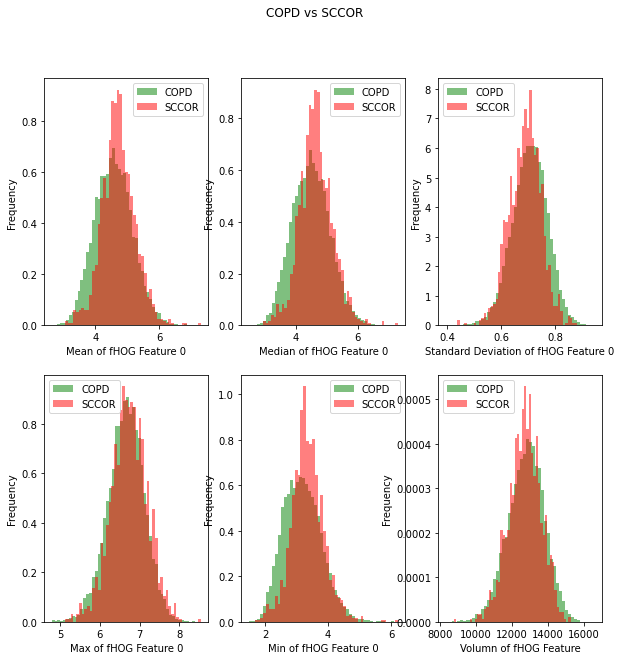

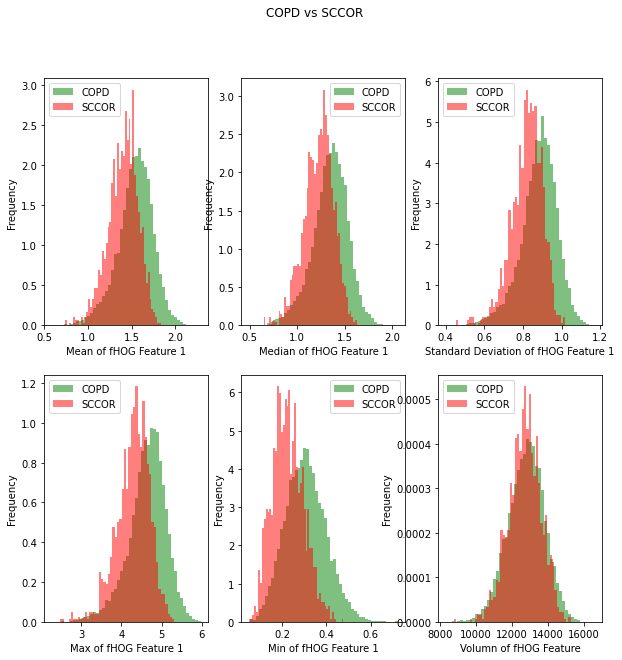

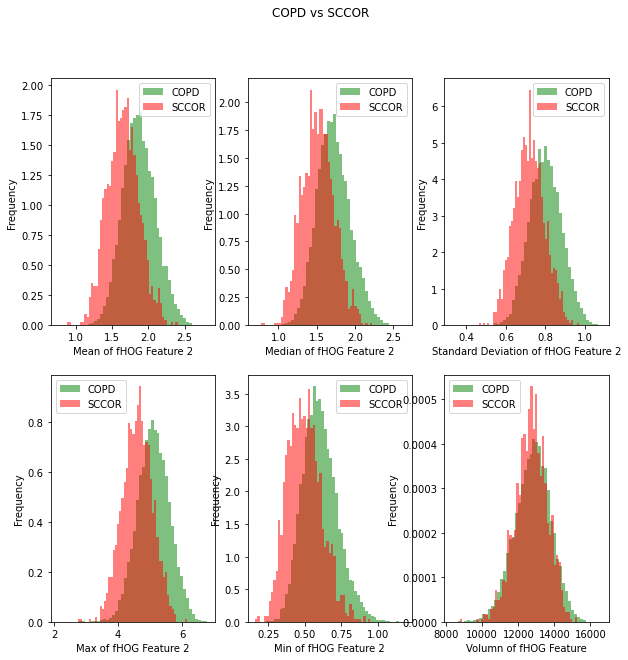

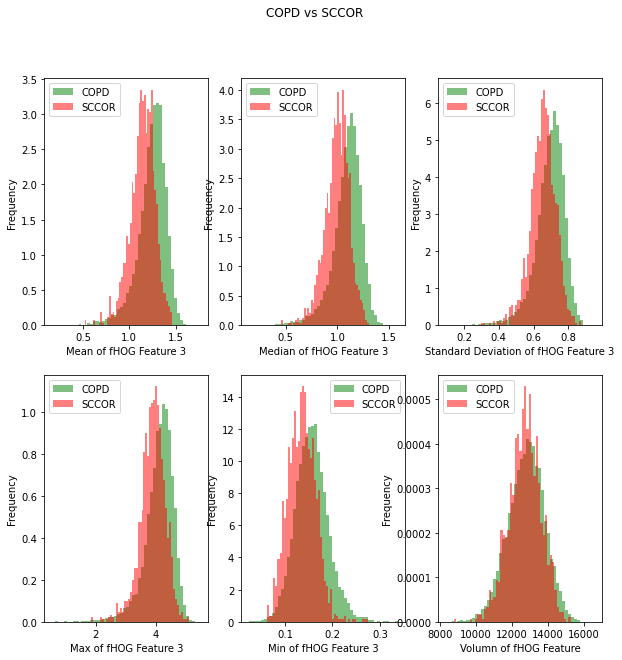

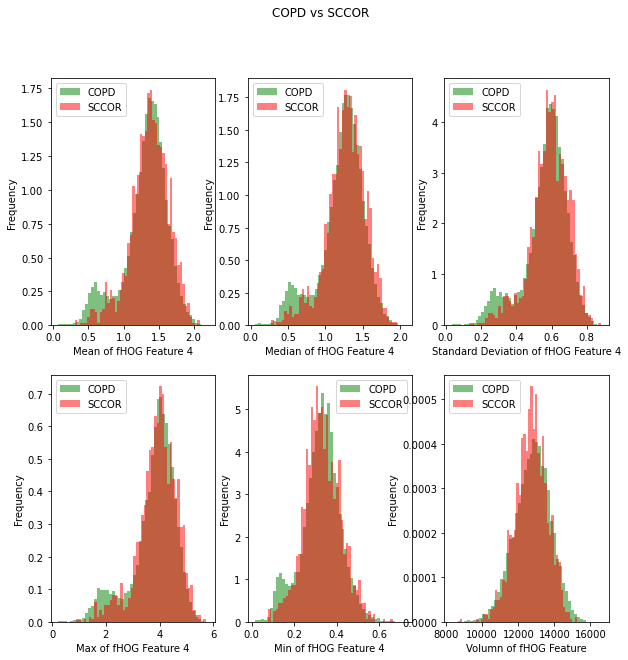

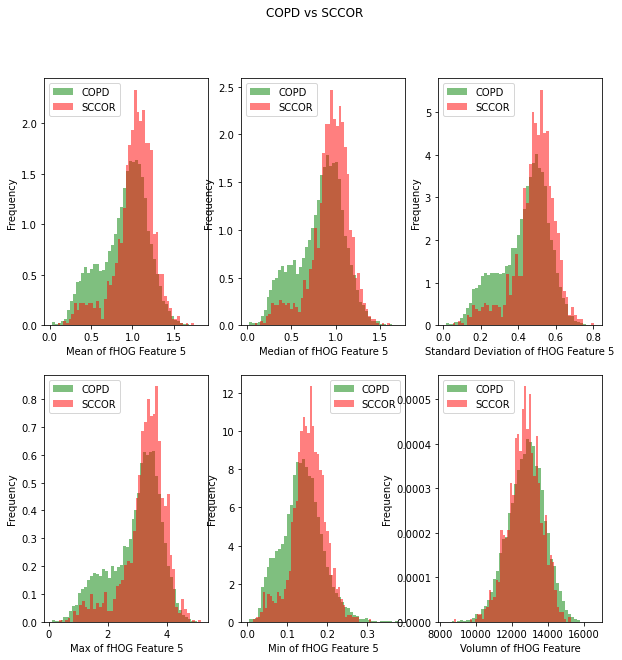

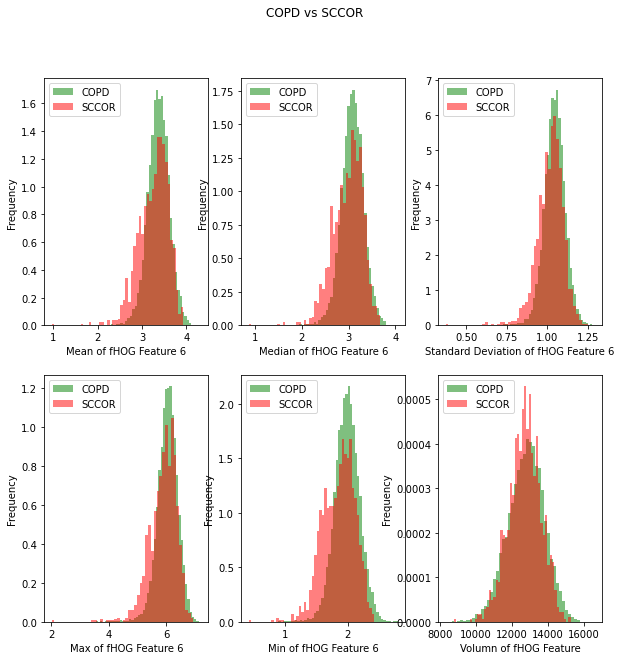

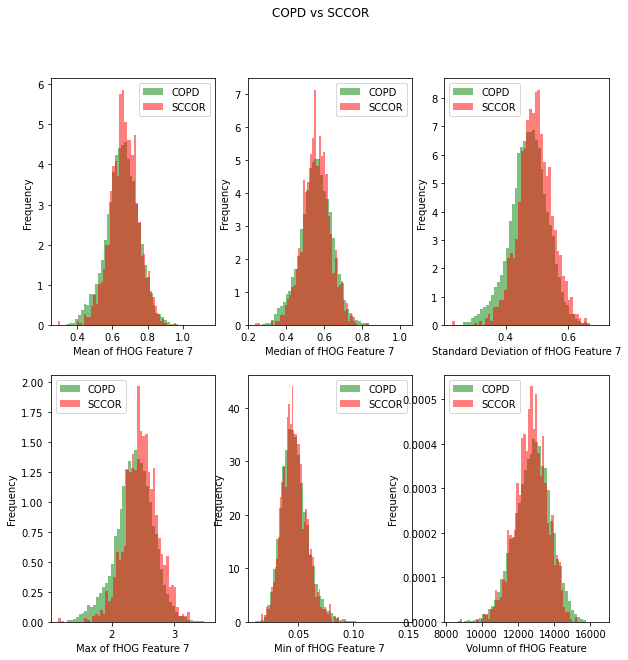

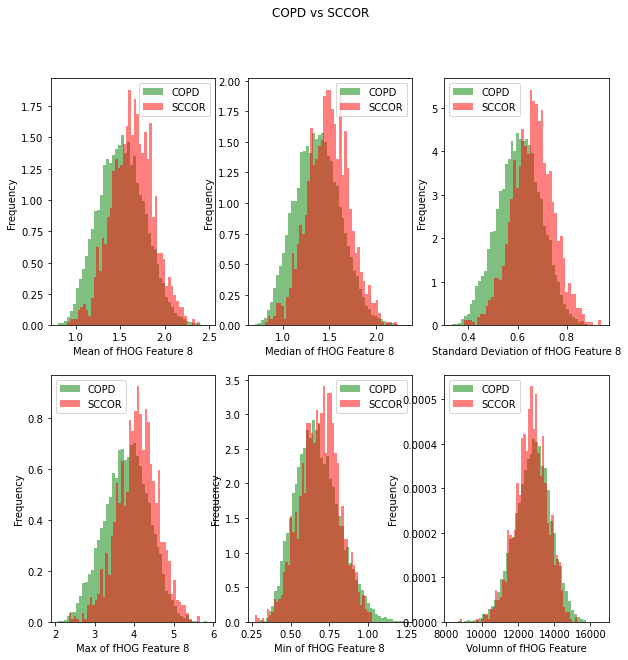

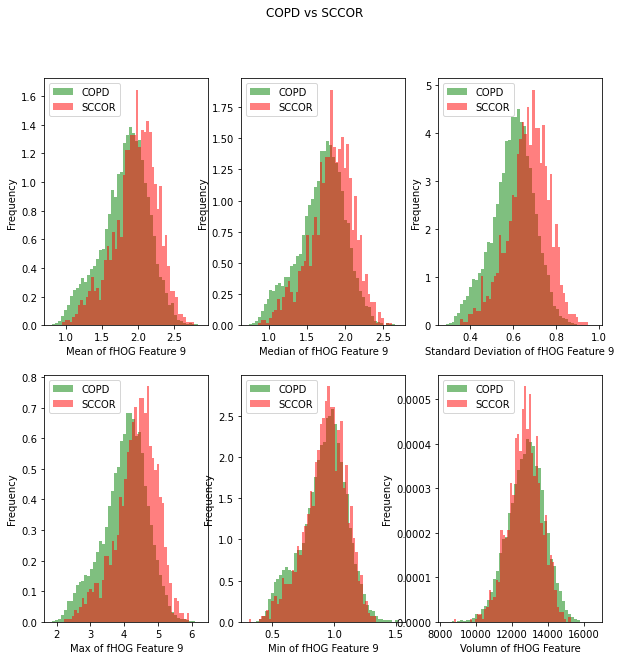

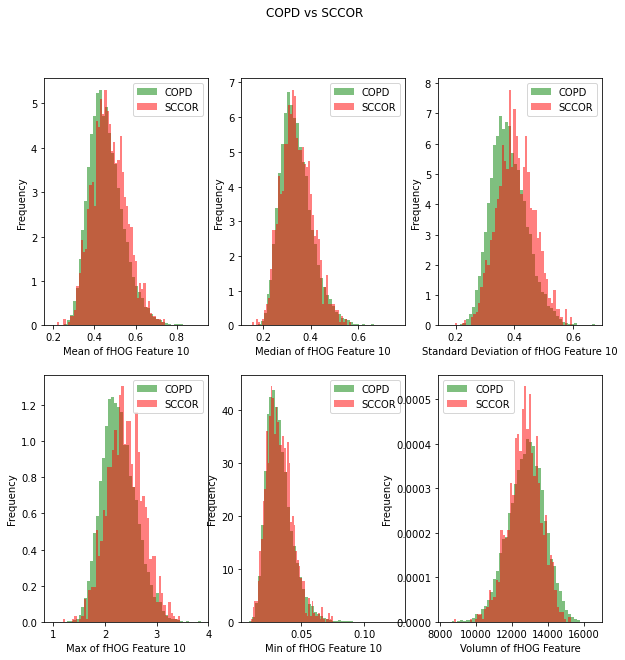

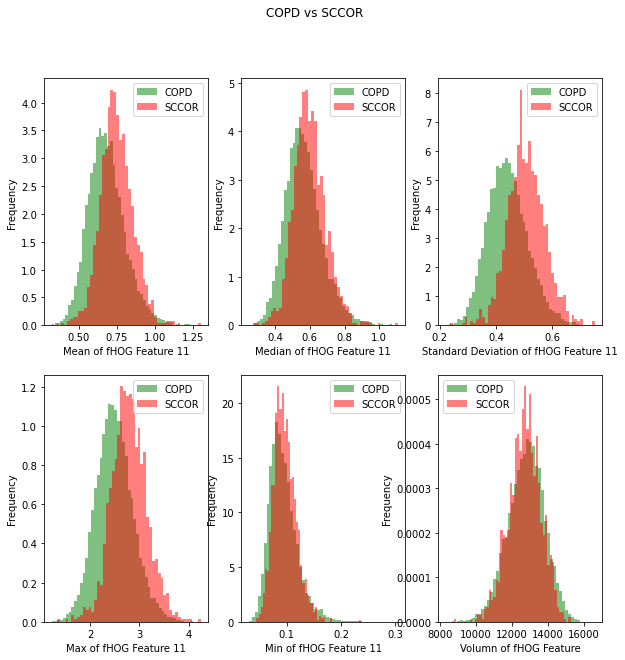

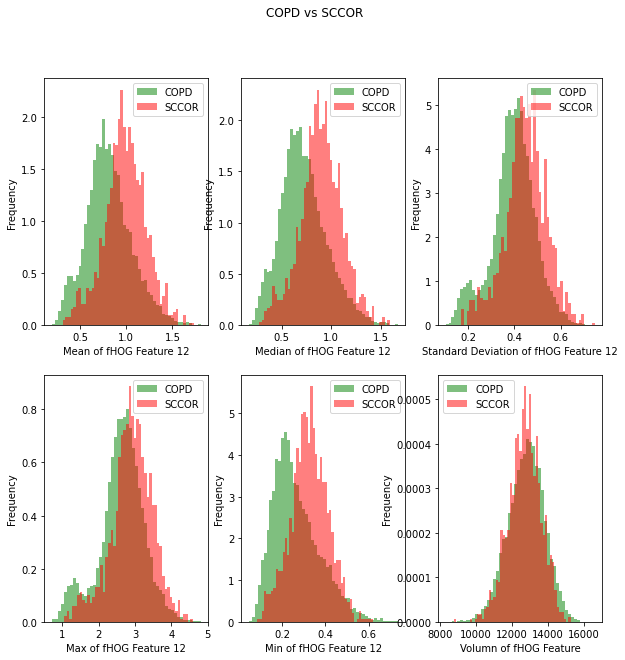

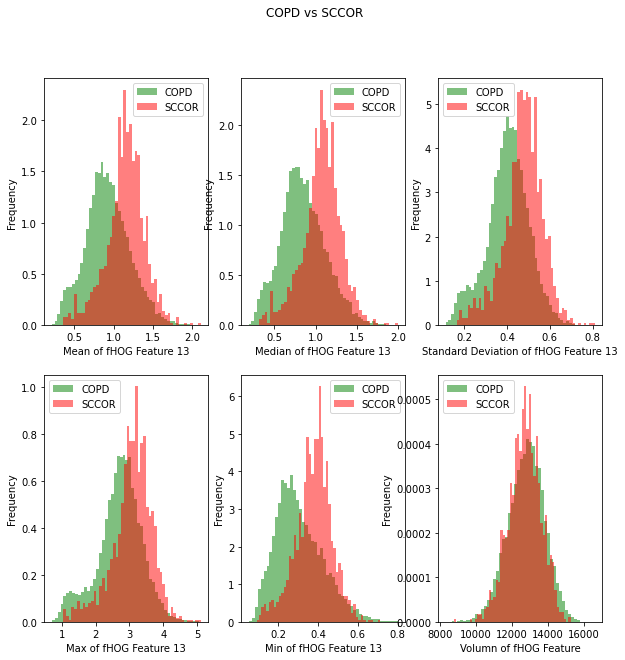

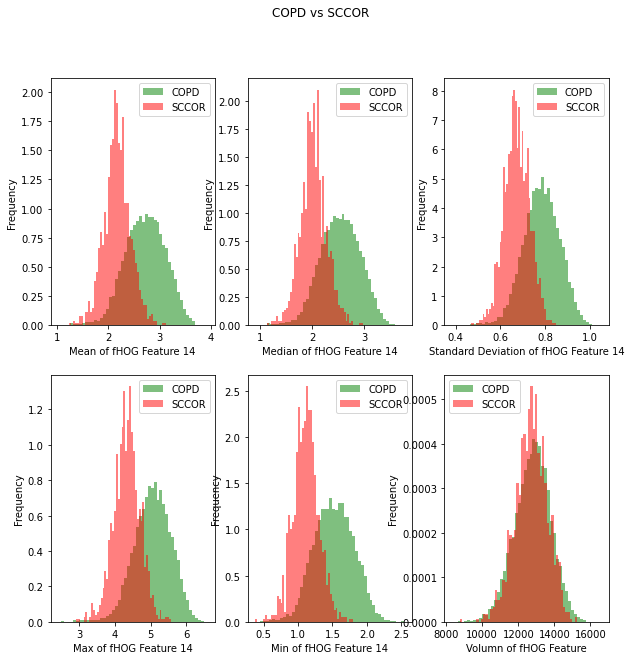

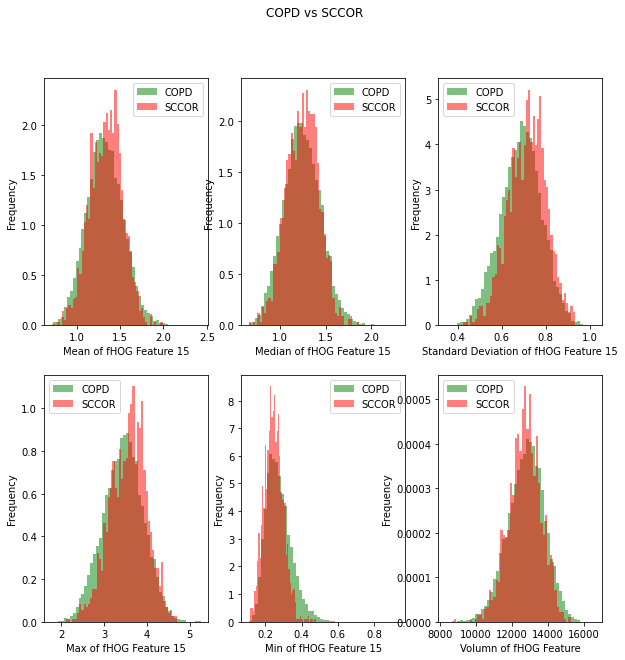

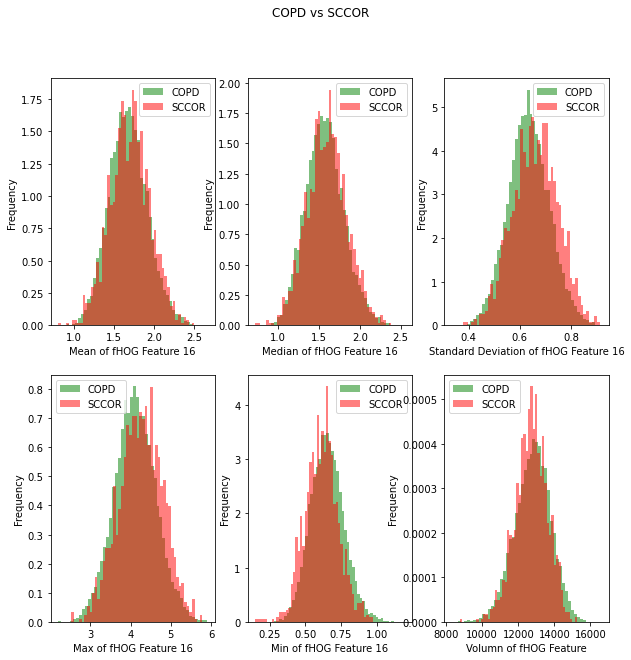

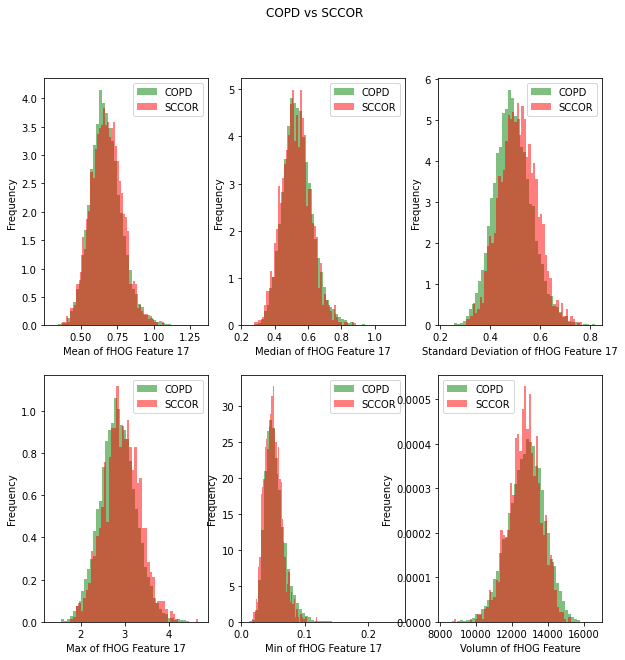

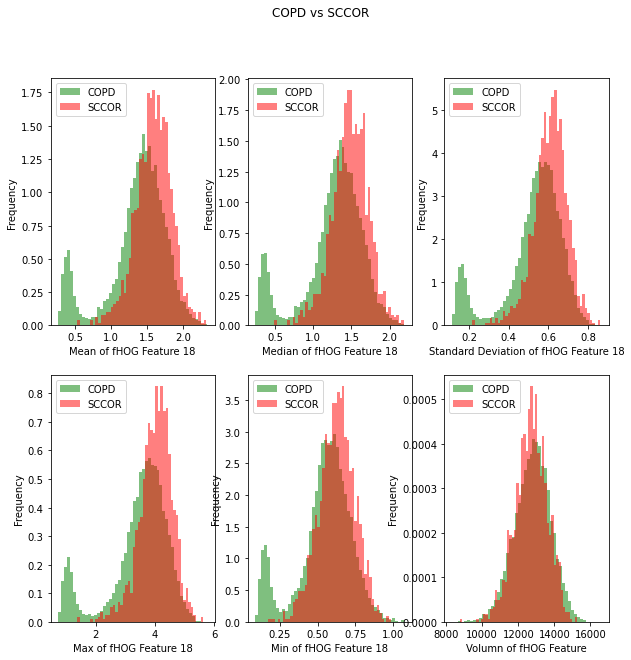

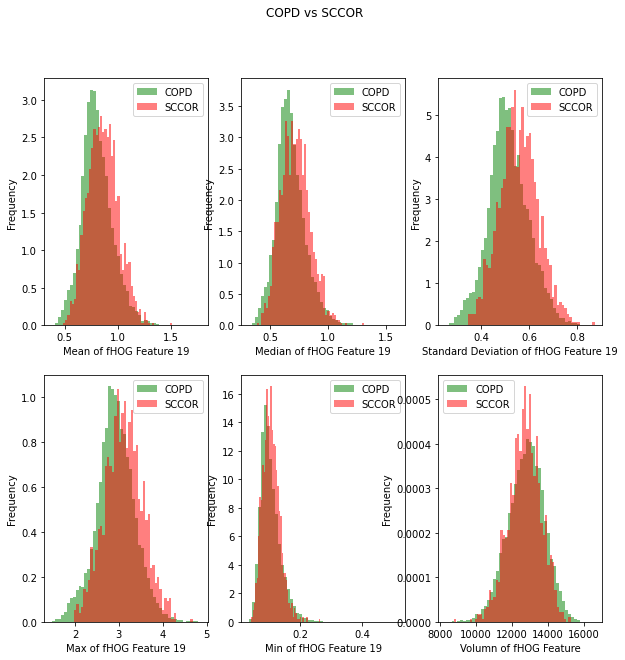

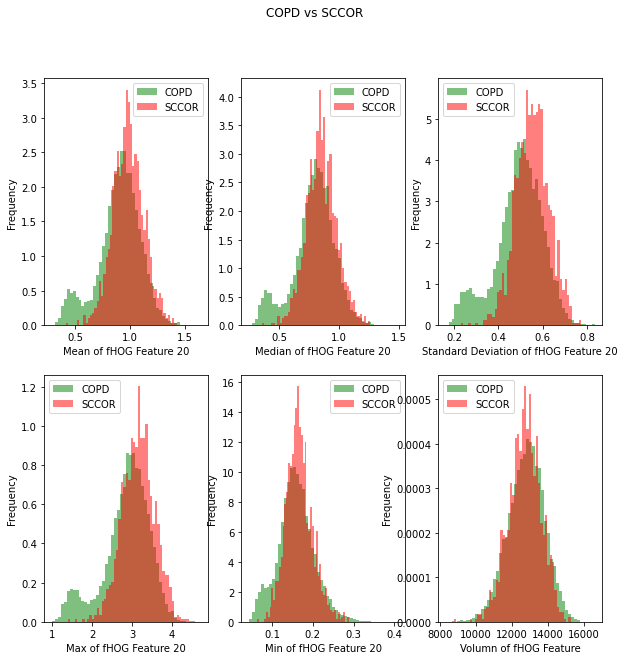

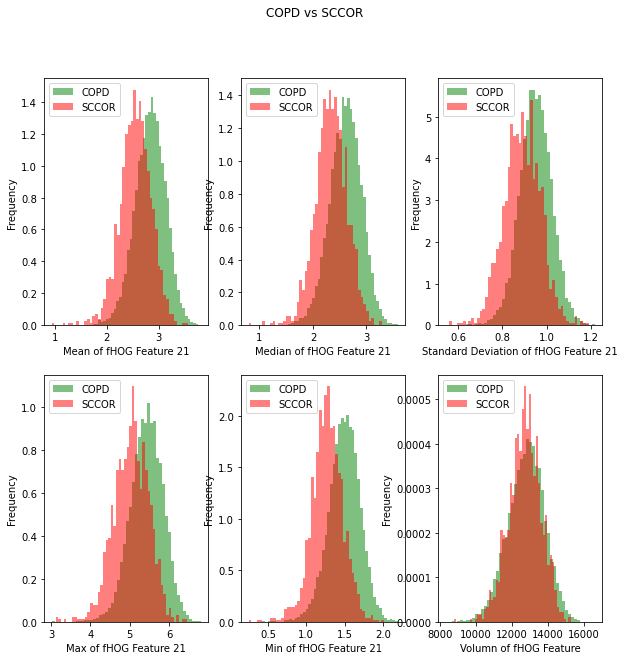

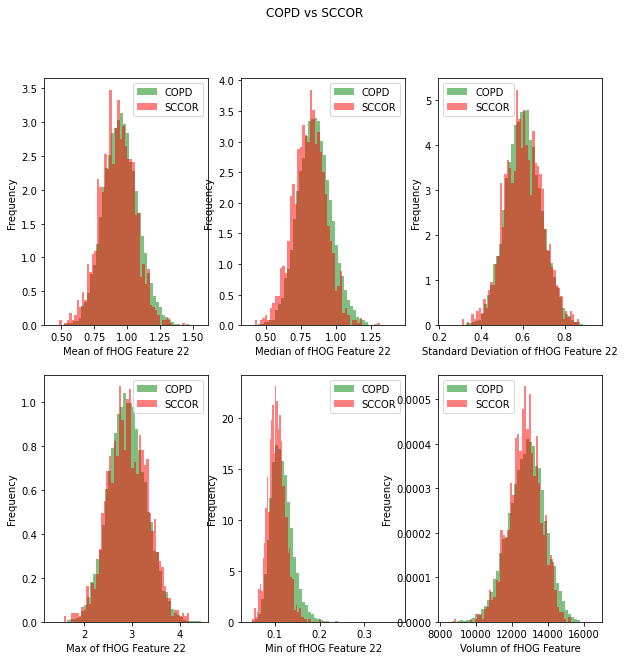

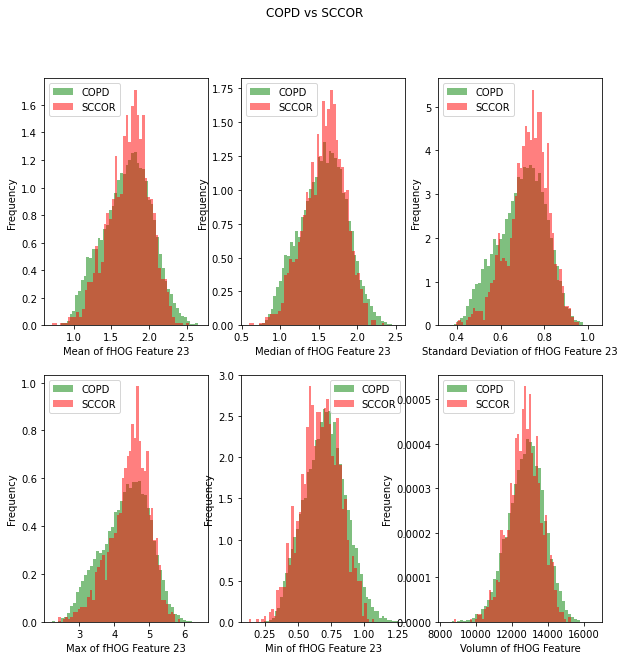

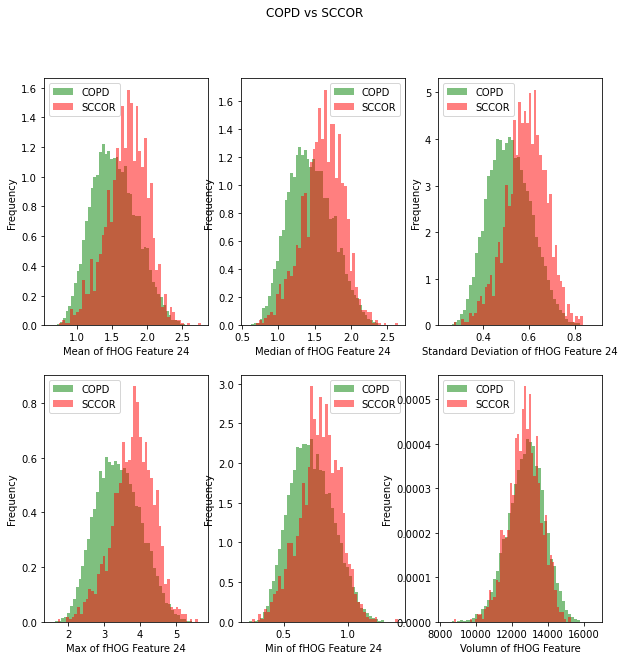

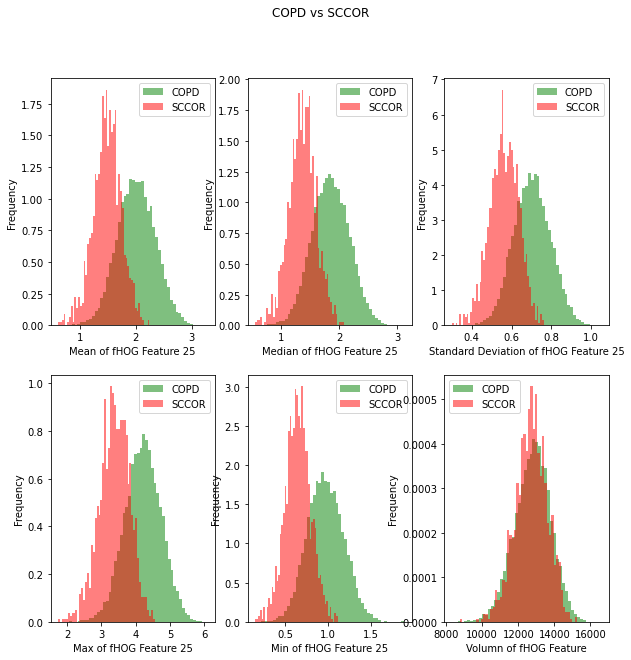

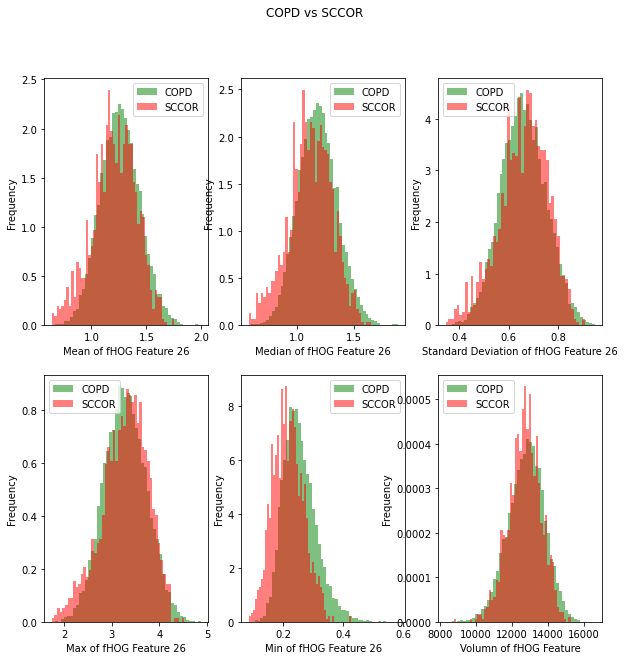

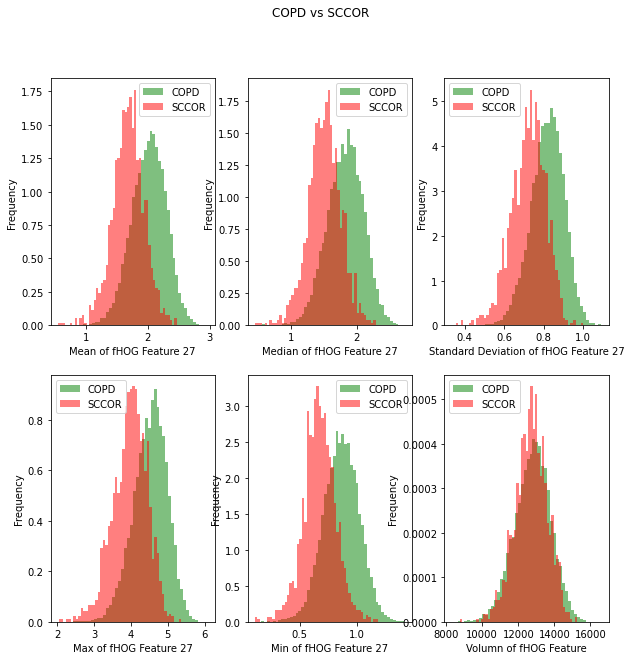

In [21]:
for i in range(28):

    fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3 ,figsize=(10,10))
    ax1.hist(copd_meanF[i], label="COPD", alpha=0.5, color="green", density=True, bins=50)
    ax1.hist(sccor_meanF[i], label="SCCOR", alpha=0.5, color="red", density=True, bins=50)
    ax1.set(xlabel='Mean of fHOG Feature '+str(i), ylabel='Frequency')
    ax1.legend()

    ax2.hist(copd_medianF[i], label="COPD", alpha=0.5, color="green", density=True, bins=50)
    ax2.hist(sccor_medianF[i], label="SCCOR", alpha=0.5, color="red", density=True, bins=50)
    ax2.set(xlabel='Median of fHOG Feature '+str(i), ylabel='Frequency')
    ax2.legend()

    ax3.hist(copd_stdF[i], label="COPD", alpha=0.5, color="green", density=True, bins=50)
    ax3.hist(sccor_stdF[i], label="SCCOR", alpha=0.5, color="red", density=True, bins=50)
    ax3.set(xlabel='Standard Deviation of fHOG Feature '+str(i), ylabel='Frequency')
    ax3.legend()

    ax4.hist(copd_maxF[i], label="COPD", alpha=0.5, color="green", density=True, bins=50)
    ax4.hist(sccor_maxF[i], label="SCCOR", alpha=0.5, color="red", density=True, bins=50)
    ax4.set(xlabel='Max of fHOG Feature '+str(i), ylabel='Frequency')
    ax4.legend()

    ax5.hist(copd_minF[i], label="COPD", alpha=0.5, color="green", density=True, bins=50)
    ax5.hist(sccor_minF[i], label="SCCOR", alpha=0.5, color="red", density=True, bins=50)
    ax5.set(xlabel='Min of fHOG Feature '+str(i), ylabel='Frequency')
    ax5.legend()

    ax6.hist(copd_volume, label="COPD", alpha=0.5, color="green", density=True, bins=50)
    ax6.hist(sccor_volume, label="SCCOR", alpha=0.5, color="red", density=True, bins=50)
    ax6.set(xlabel='Volumn of fHOG Feature', ylabel='Frequency')
    ax6.legend()

    fig.suptitle("COPD vs SCCOR")

### Haralick features extraction

In [15]:
df_col_names_haralick = ["Dataset","File"]
for i in range(1, 66):
    df_col_names_haralick.append('Charili_'+str(i))

In [20]:
df_values_haralick = []
for haralick_file in copd_Haralick:
    try:
        haralick_data = pd.read_csv(haralick_file, compression='gzip', error_bad_lines=False)
        col_sum = haralick_data.sum(axis = 0, skipna = True)

        df_value_haralick = ["COPD", haralick_file]
        for i in range(1,66):
            Charili_i = col_sum.loc['Charili_'+str(i)]/len(haralick_data)
            df_value_haralick.append(Charili_i)

        df_values_haralick.append(df_value_haralick)
    except:
        print("No data found at ", haralick_file)

No data found at  /pghbio/dbmi/batmanlab/chirayu/Data/COPDGene/Images/24243G/Phase-2/SuperVoxels/24243G_INSP_STD_337_PIT_LD_ASIR100_COPD2_BSpline_Iso1.0mm_SuperVoxel_Param30mm_haralick.csv.gz
No data found at  /pghbio/dbmi/batmanlab/chirayu/Data/COPDGene/Test_Reproducing_Phase-1_Images/12341Q/Phase-1/SuperVoxels/12341Q_INSP_STD_MSM_COPD_BSpline_Iso1.0mm_SuperVoxel_Param30mm_haralick.csv.gz


In [21]:
for haralick_file in sccor_Haralick:
    try:
        haralick_data = pd.read_csv(haralick_file, compression='gzip', error_bad_lines=False)
        col_sum = haralick_data.sum(axis = 0, skipna = True)

        df_value_haralick = ["SCCOR", haralick_file]
        for i in range(1,66):
            Charili_i = col_sum.loc['Charili_'+str(i)]/len(haralick_data)
            df_value_haralick.append(Charili_i)

        df_values_haralick.append(df_value_haralick)
    except:
        print("No data found at ", haralick_file)

In [22]:
df_haralick = pd.DataFrame(df_values_haralick,columns=df_col_names_haralick)
df_haralick.head()

Dataset                                               File  Charili_1  \
0    COPD  /pghbio/dbmi/batmanlab/chirayu/Data/COPDGene/T...   0.058634   
1    COPD  /pghbio/dbmi/batmanlab/chirayu/Data/COPDGene/T...   0.016861   
2    COPD  /pghbio/dbmi/batmanlab/chirayu/Data/COPDGene/T...   0.035584   
3    COPD  /pghbio/dbmi/batmanlab/chirayu/Data/COPDGene/T...   0.042444   
4    COPD  /pghbio/dbmi/batmanlab/chirayu/Data/COPDGene/I...   0.047051   

    Charili_2  Charili_3  Charili_4  Charili_5  Charili_6   Charili_7  \
0  110.085406   0.242522  25.247254   0.412227  23.573966  235.464756   
1   89.120296   0.261191  20.767458   0.296992  29.267969  186.529696   
2  109.021488   0.243500  24.777507   0.367425  23.842145  230.536824   
3   95.128247   0.249630  23.403033   0.376661  24.462842  209.684251   
4   91.857600   0.236288  21.304177   0.389090  22.124045  195.597828   

   Charili_8  ...  Charili_56  Charili_57  Charili_58  Charili_59  Charili_60  \
0   3.041846  ...   22.971957    0.553979   18.431227  123.275524    2.424800   
1   3.383794  ...   15.619707    0.429101   22.378295   84.612872    2.760725   
2   3.169882  ...   21.052352    0.503339   17.449720  111.661953    2.570084   
3   3.137209  ...   17.812486    0.534351   19.465851   93.885063    2.463175   
4   3.072062  ...   16.880244    0.542231   16.709904   90.033061    2.381238   

   Charili_61  Charili_62  Charili_63  Charili_64  Charili_65  
0    3.178424   13.527008    1.734905   -0.202453    0.591329  
1    3.963990    9.932625    1.927776   -0.155425    0.588033  
2    3.508037   11.782844    1.796879   -0.180648    0.588439  
3    3.327725    9.195273    1.692101   -0.183360    0.580913  
4    3.228043   10.222090    1.683231   -0.164463    0.543979  

[5 rows x 67 columns]

In [23]:
df_haralick.to_csv('haralickSummaryCOPDSCCOR.csv', index=False)  

### Plotting 65 Haralick Features

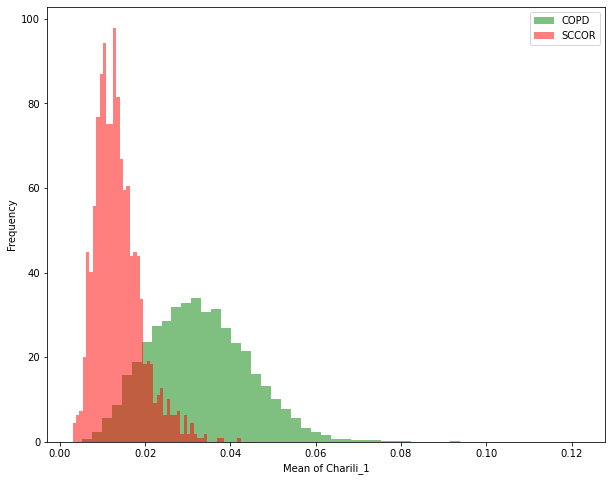

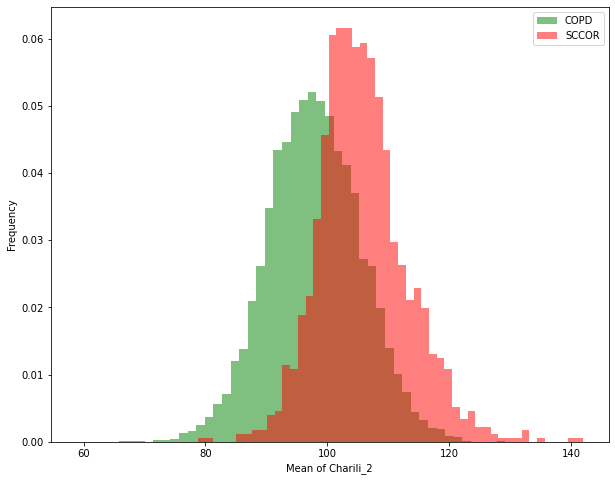

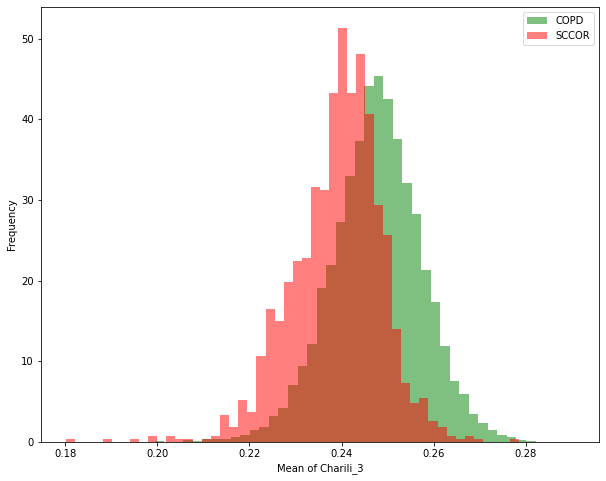

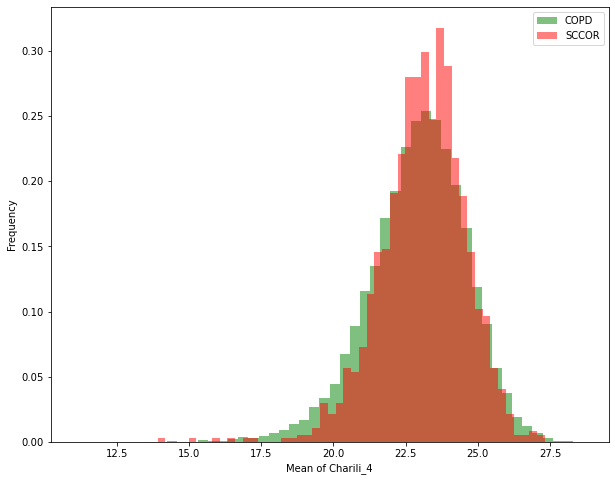

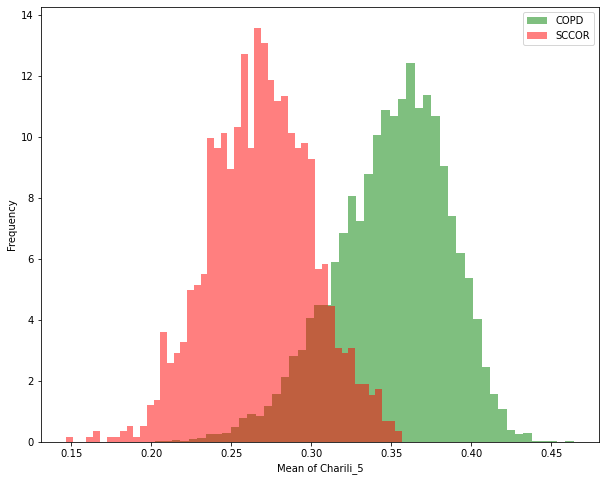

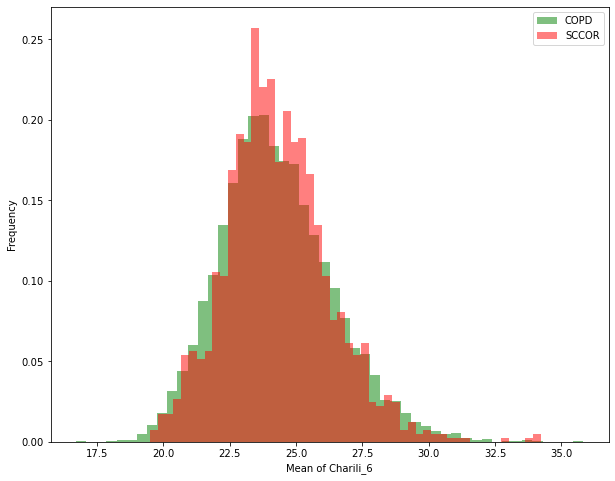

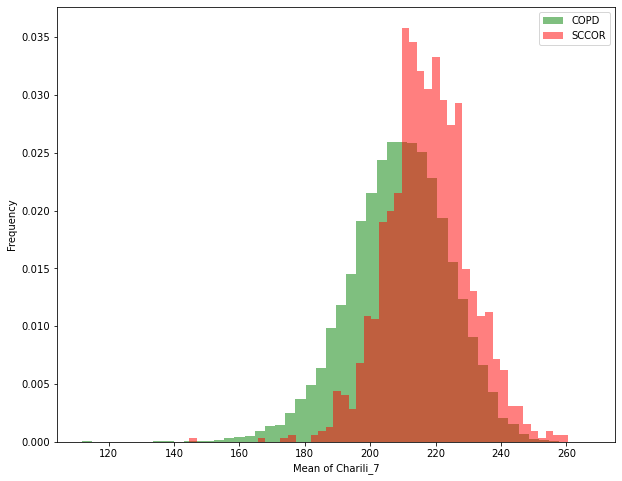

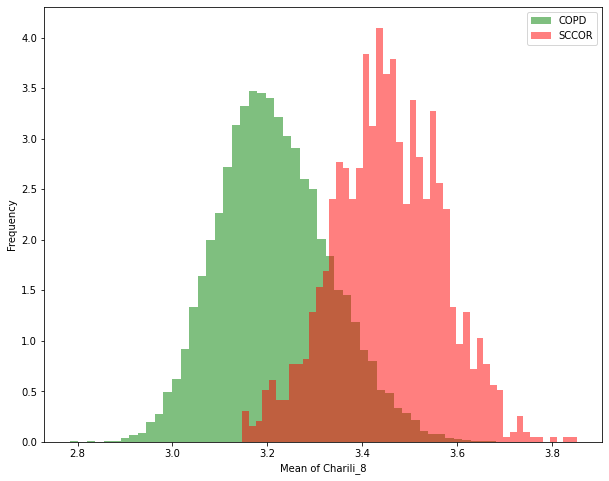

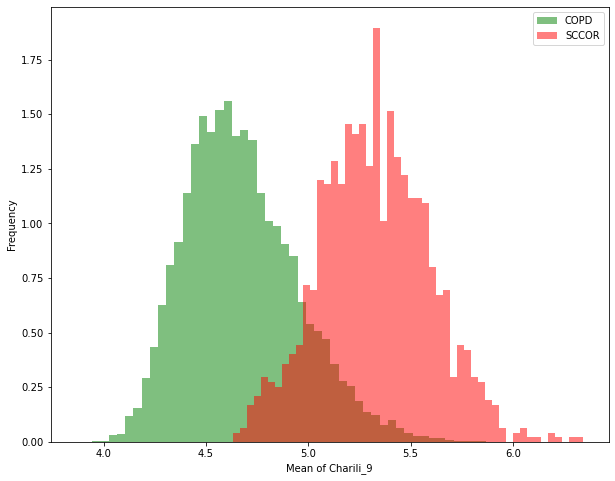

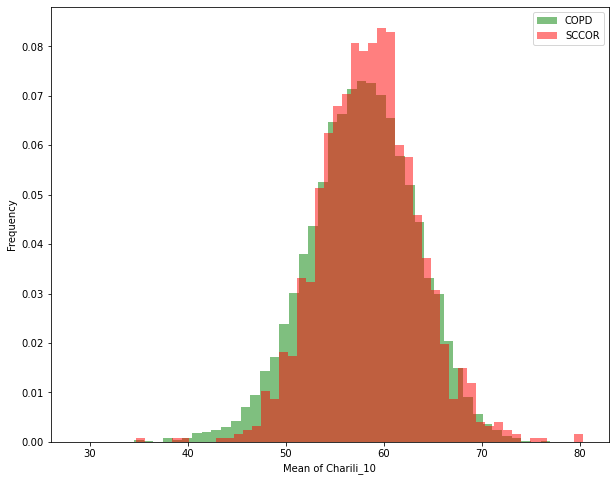

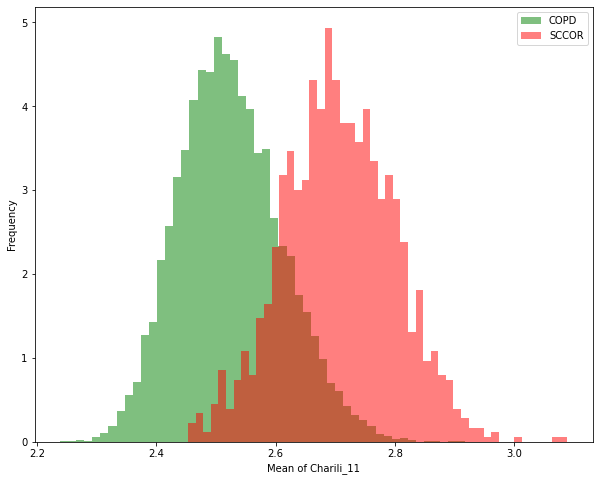

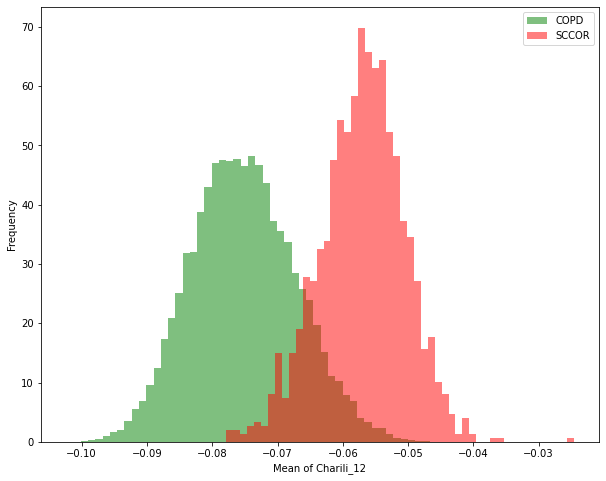

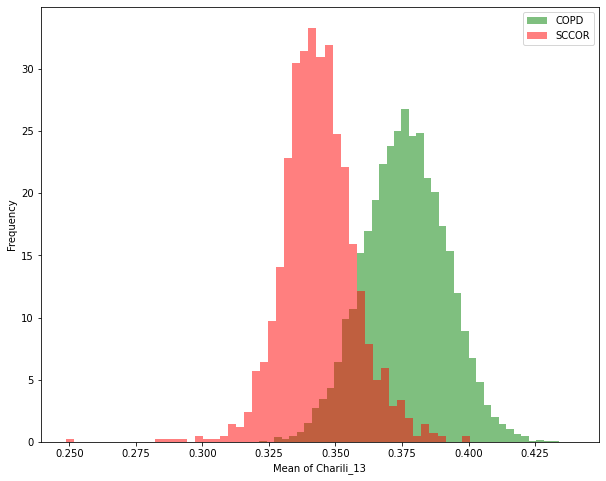

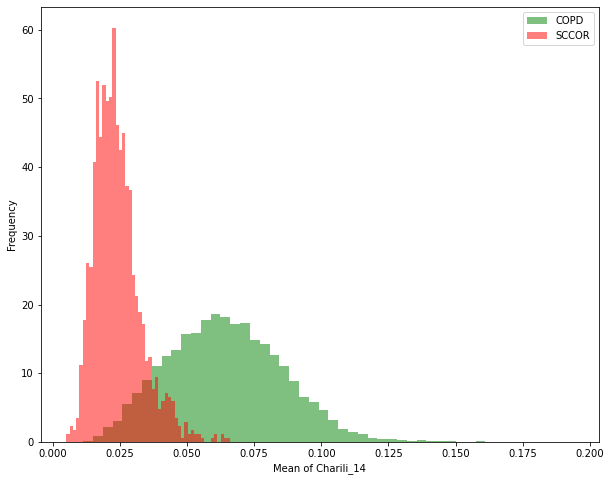

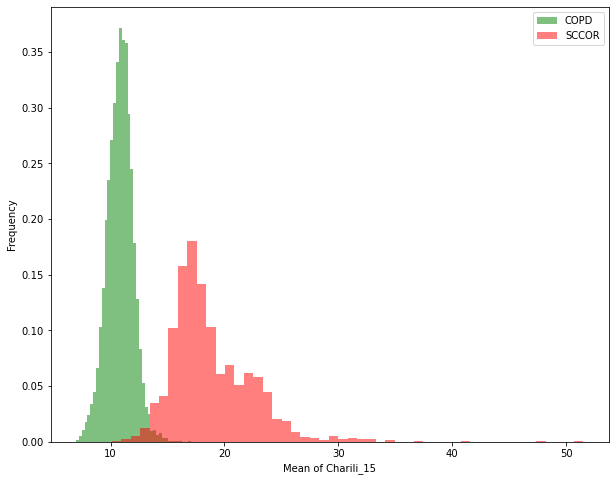

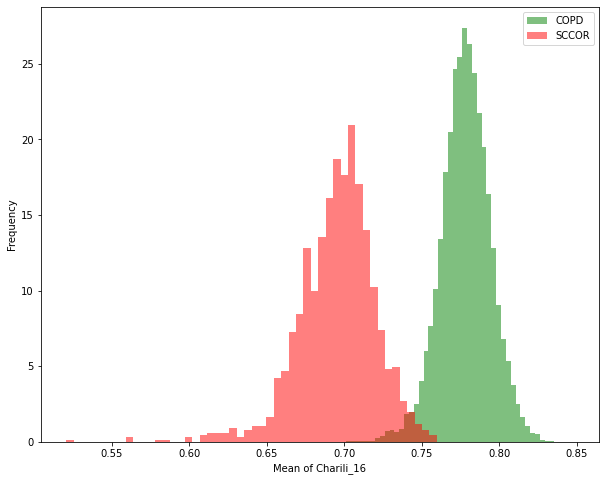

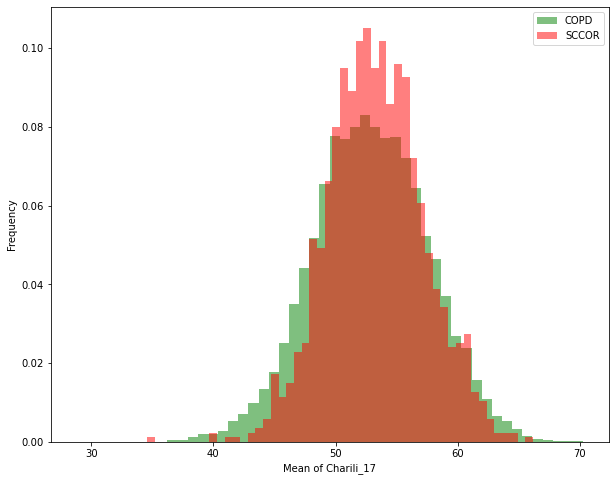

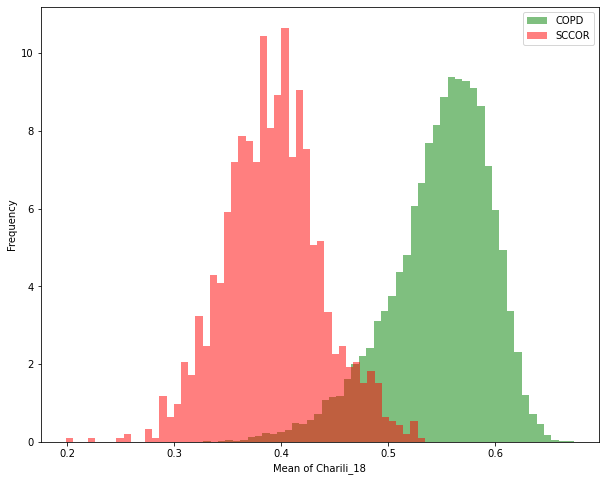

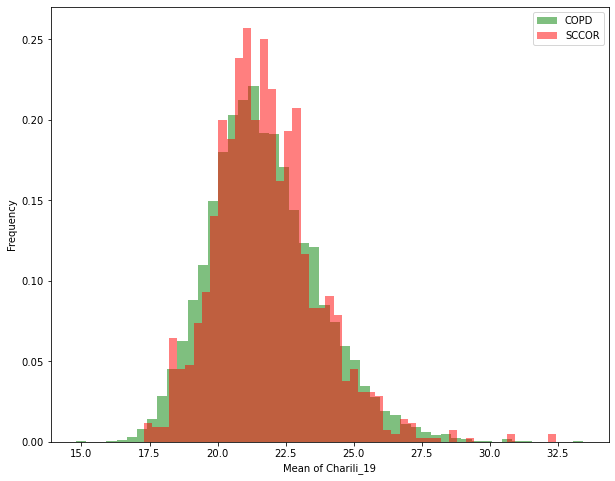

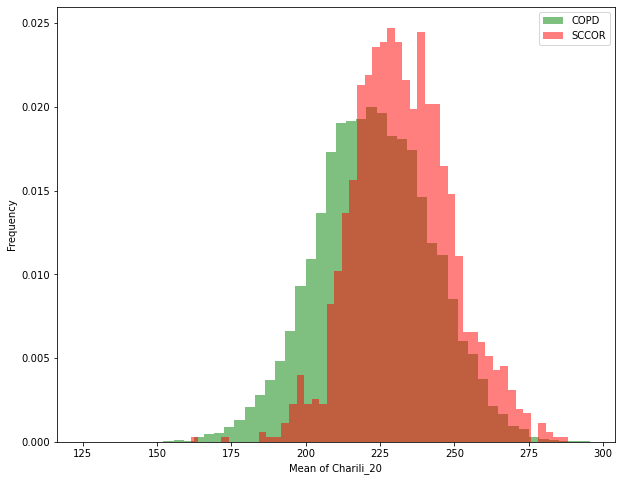

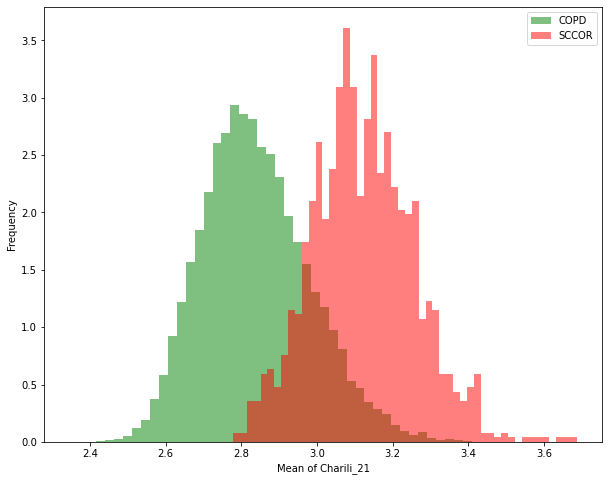

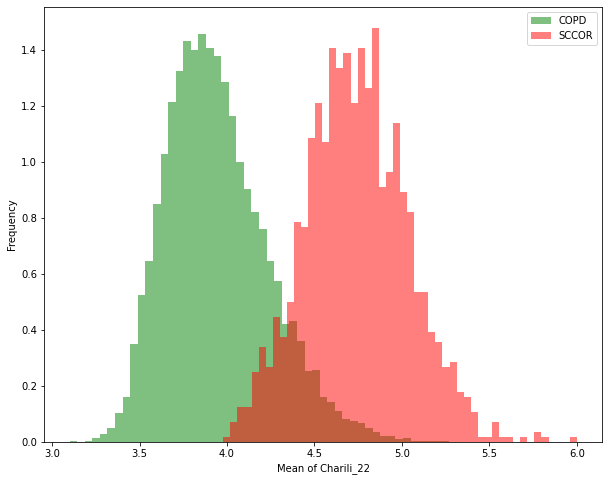

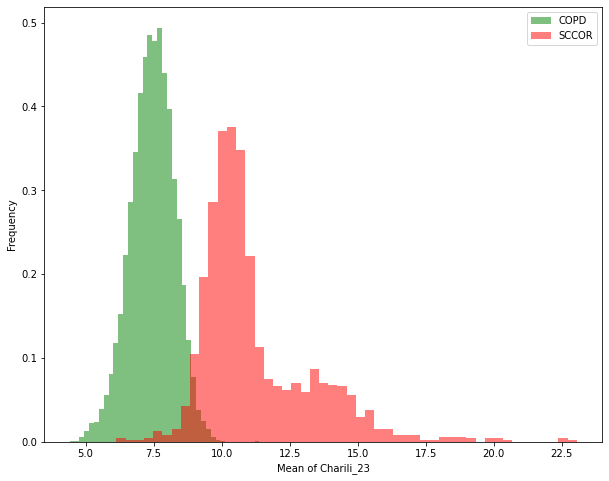

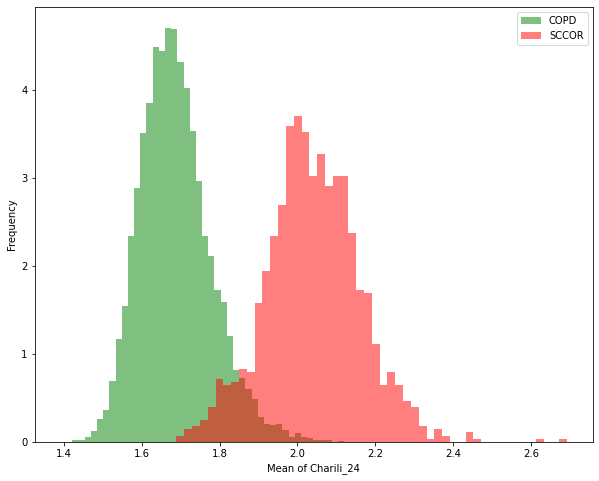

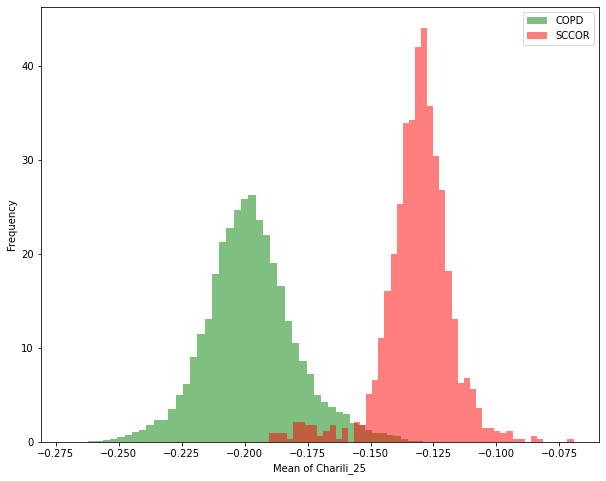

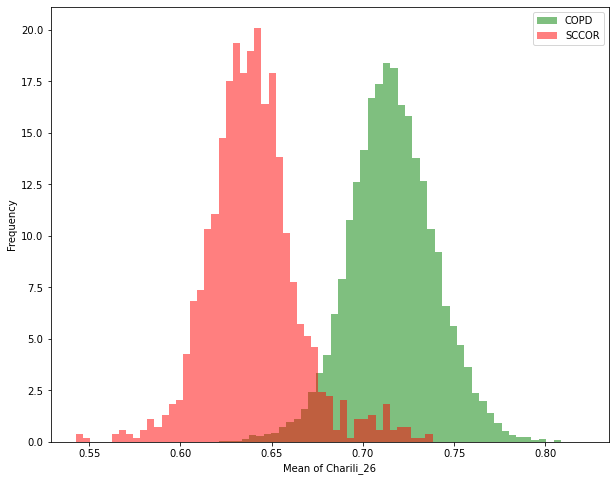

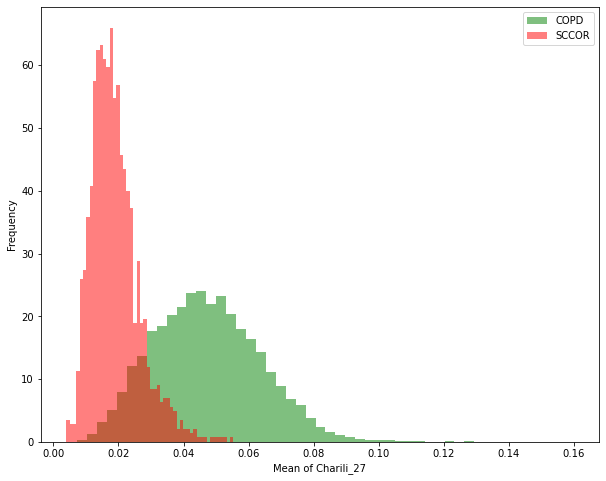

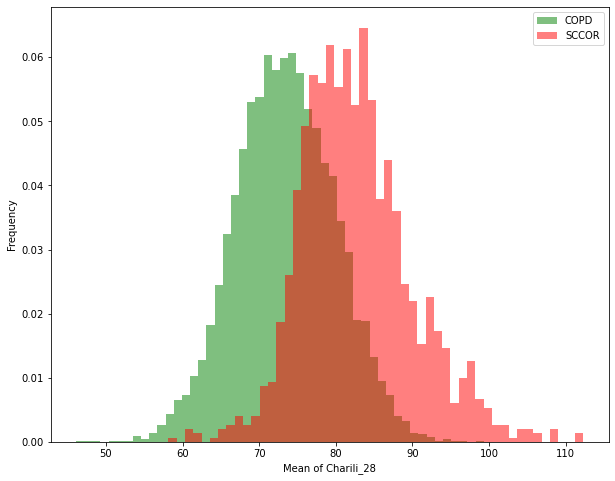

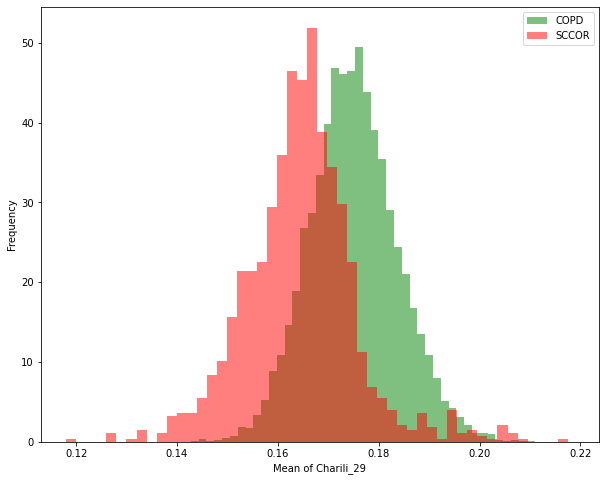

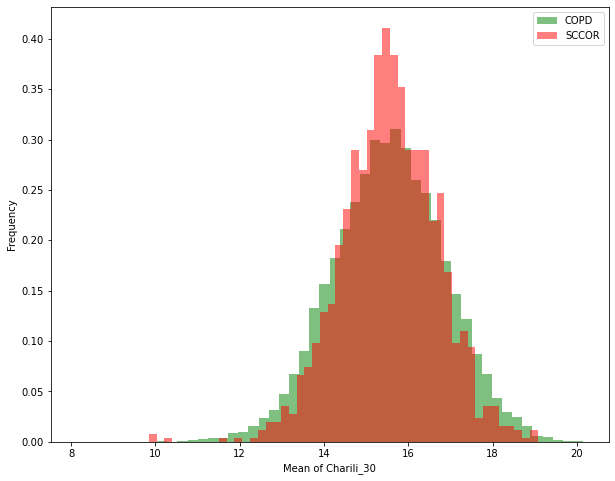

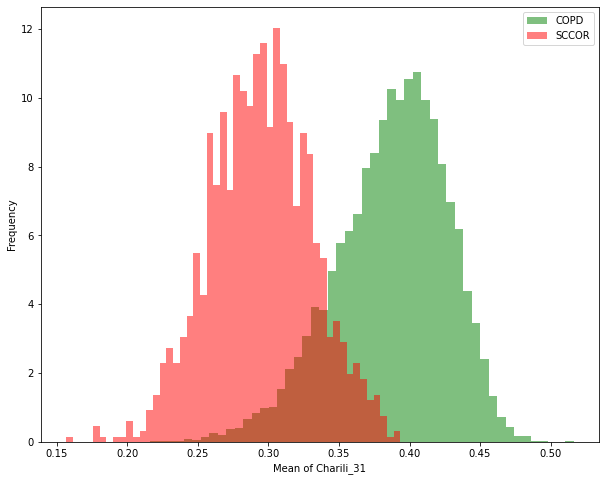

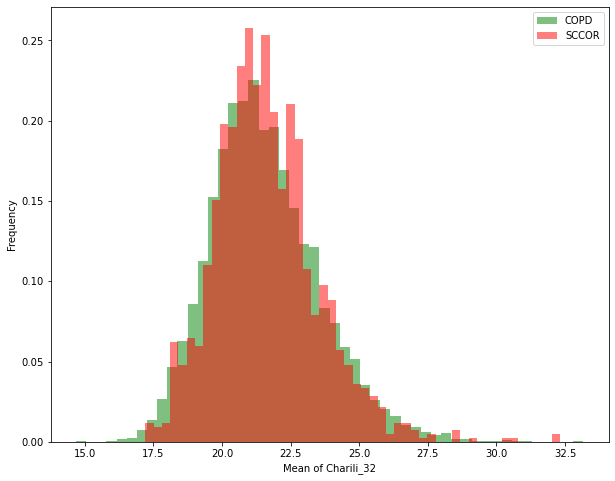

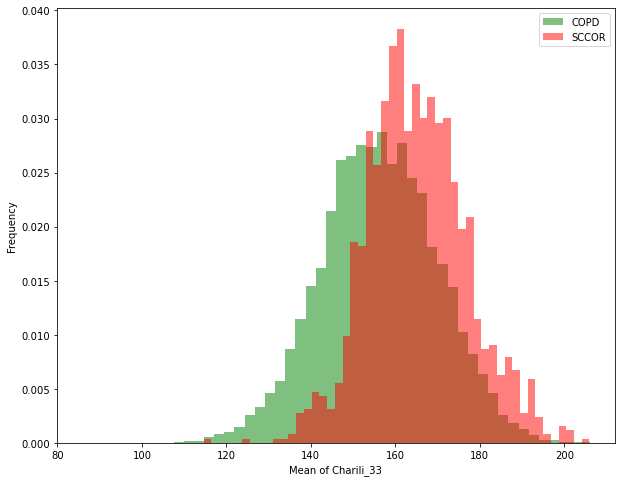

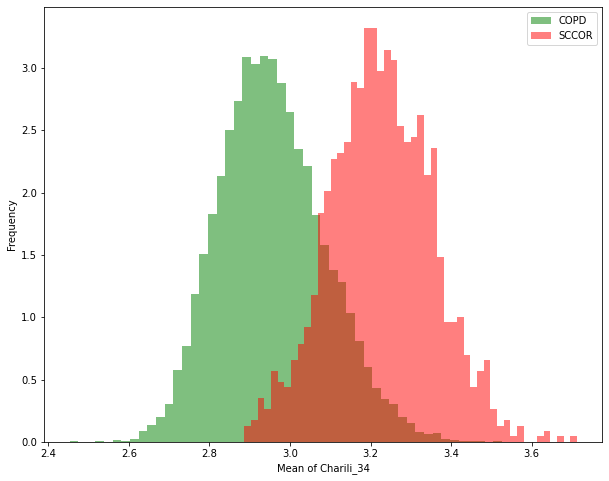

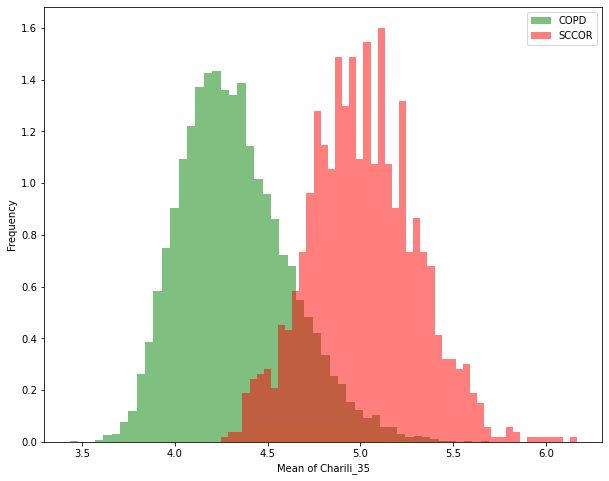

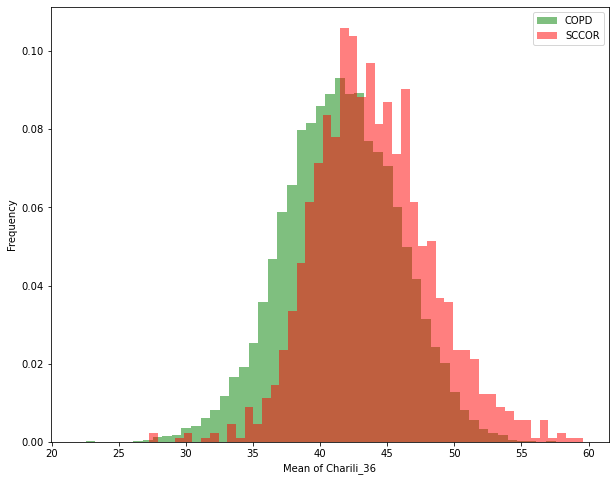

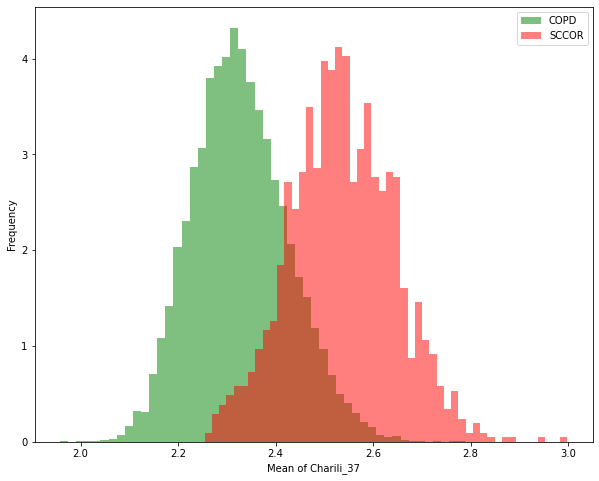

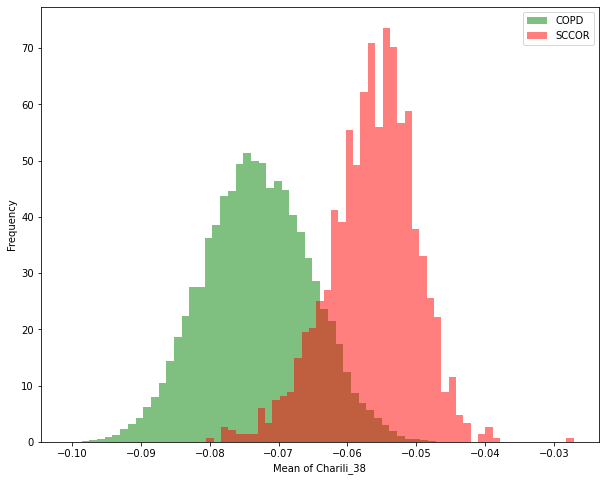

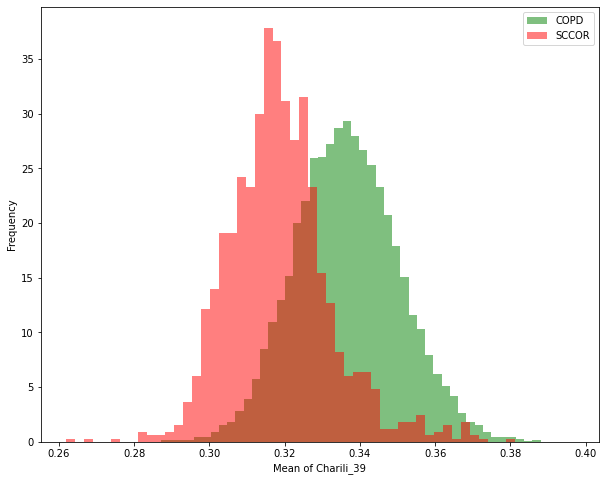

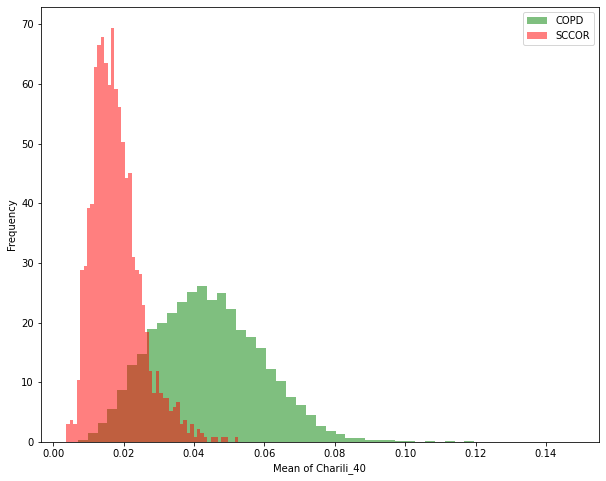

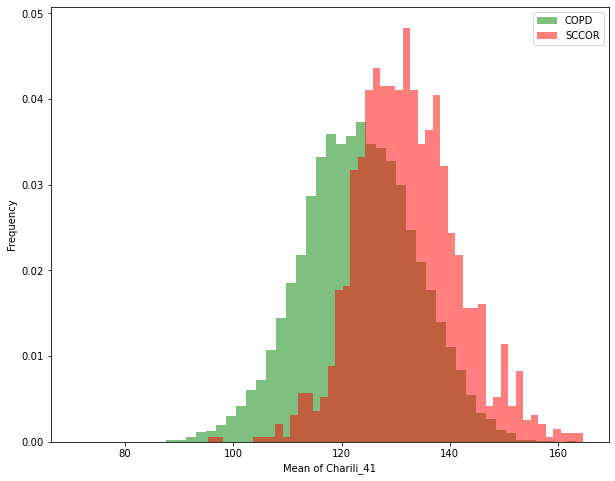

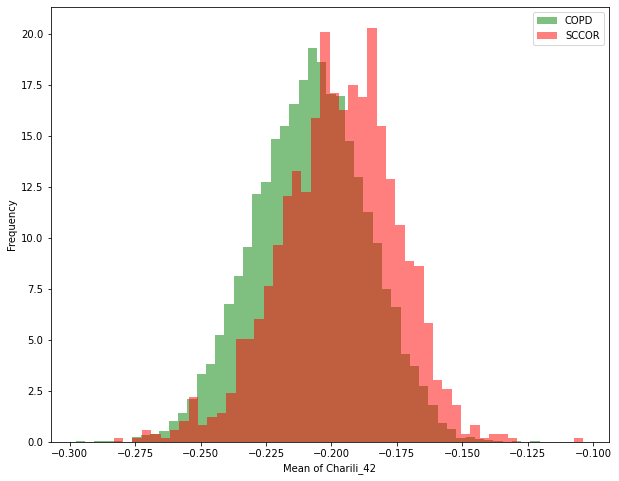

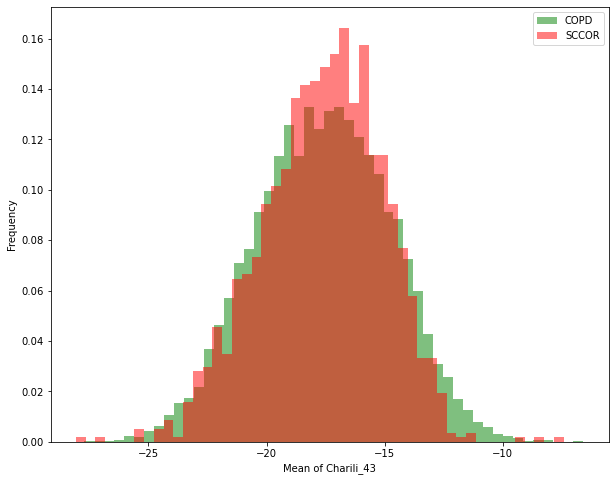

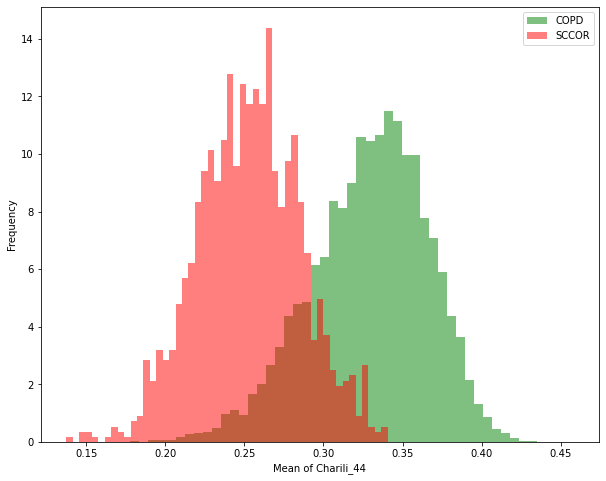

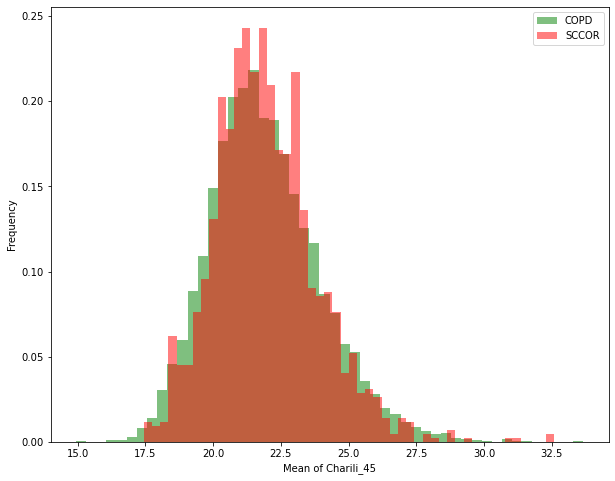

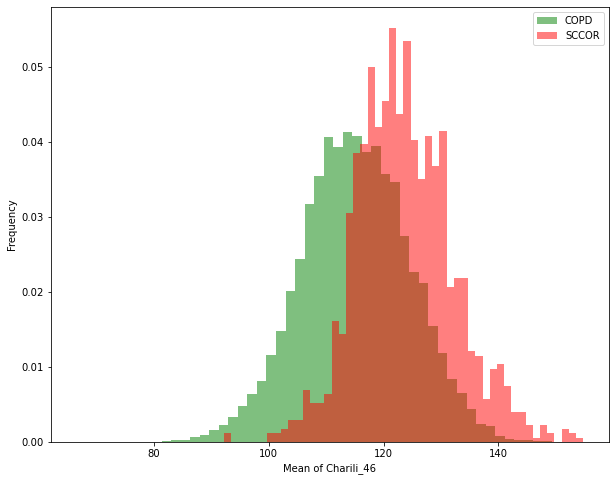

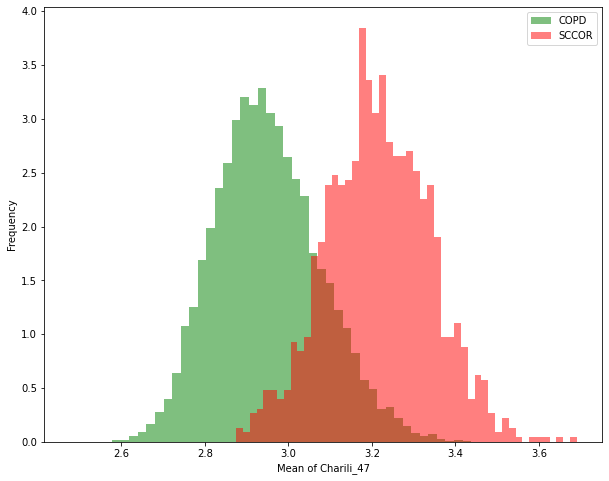

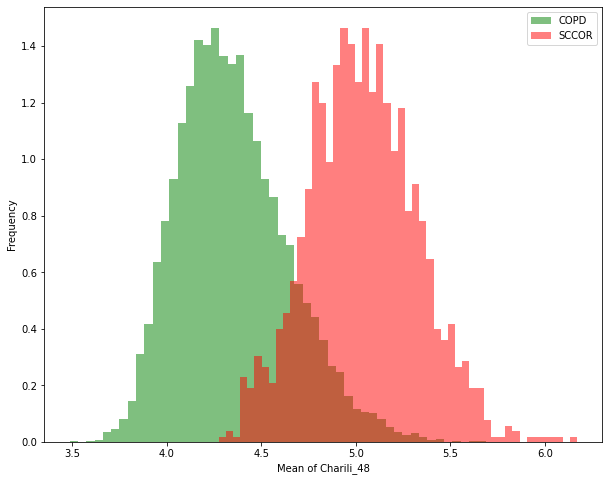

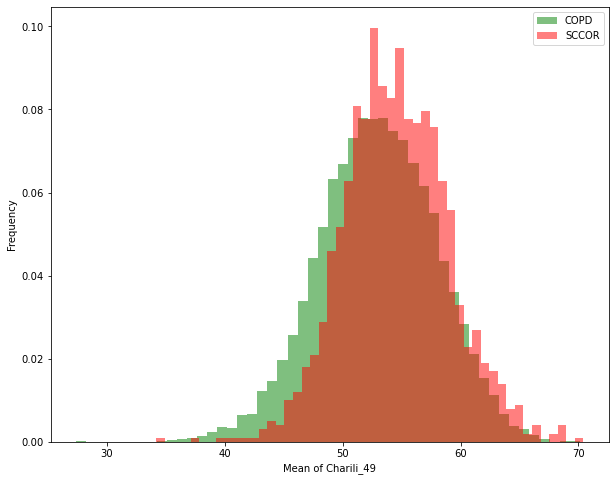

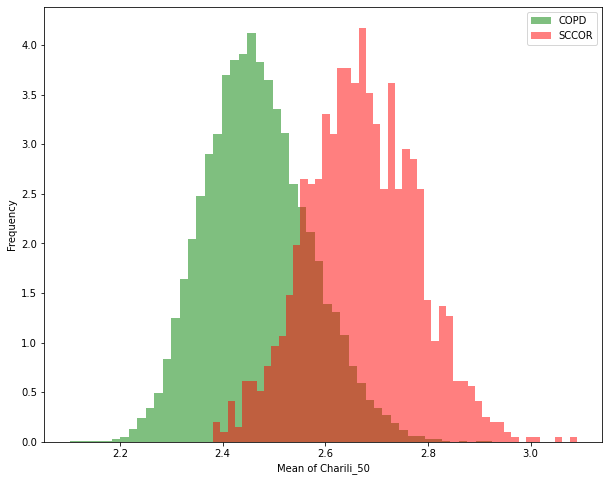

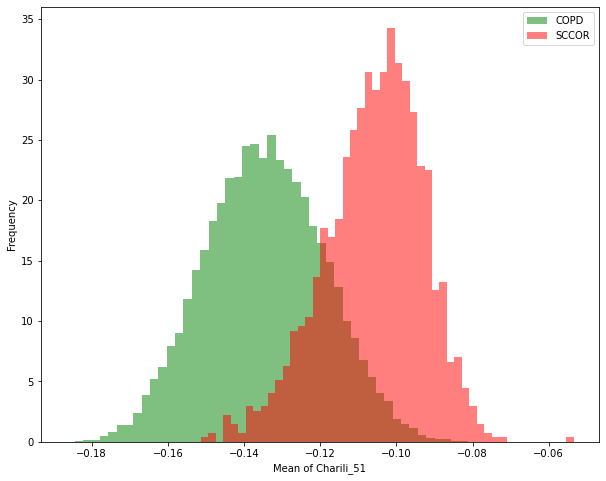

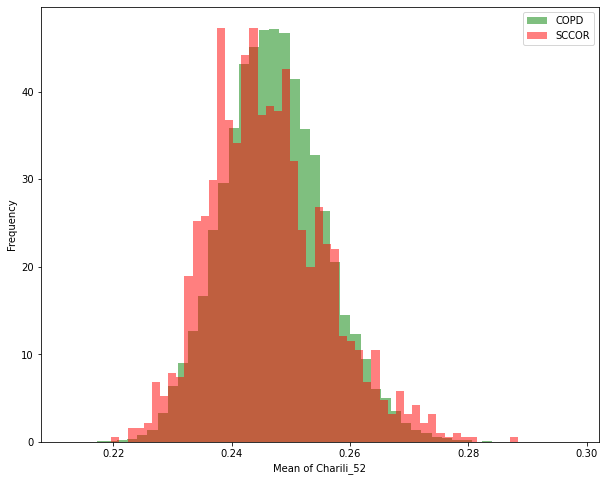

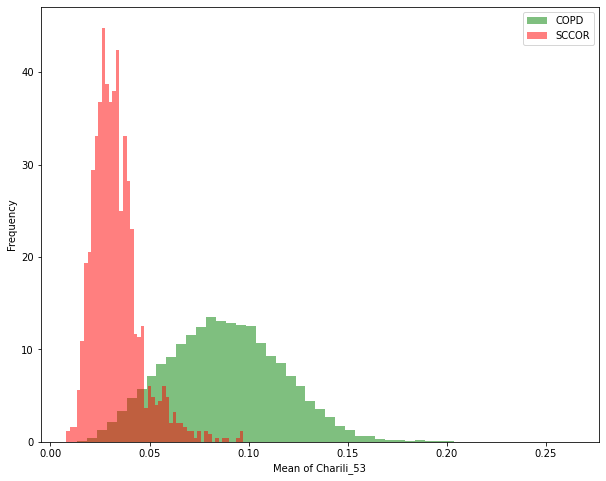

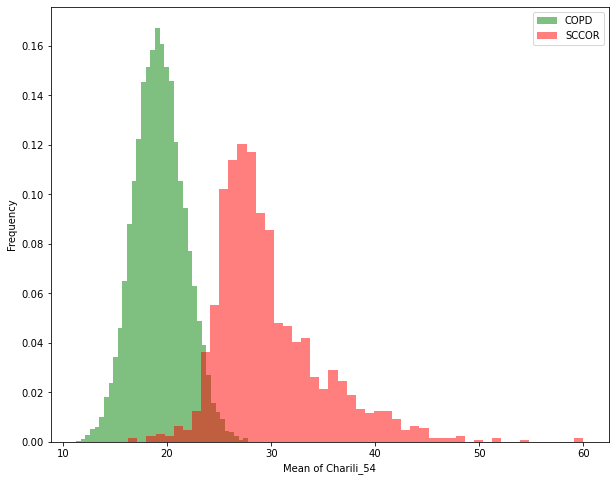

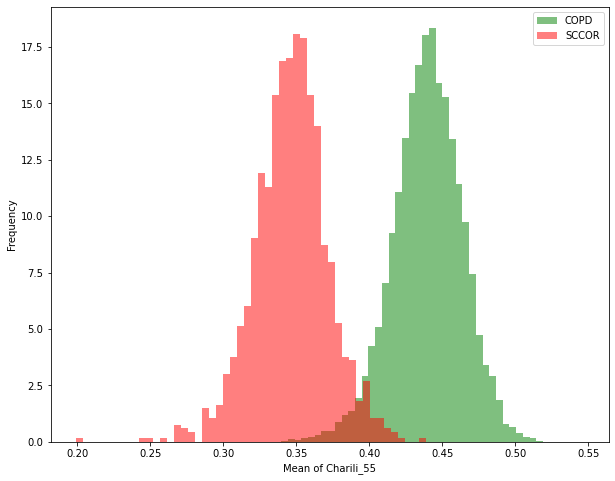

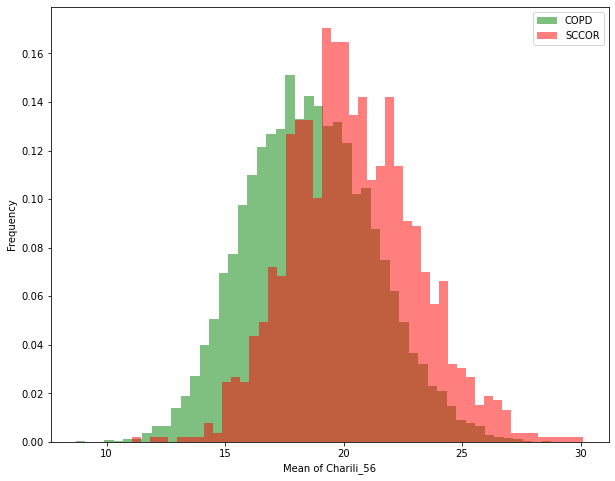

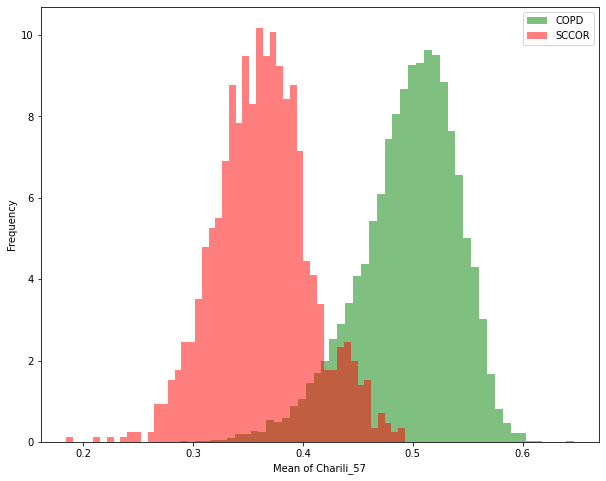

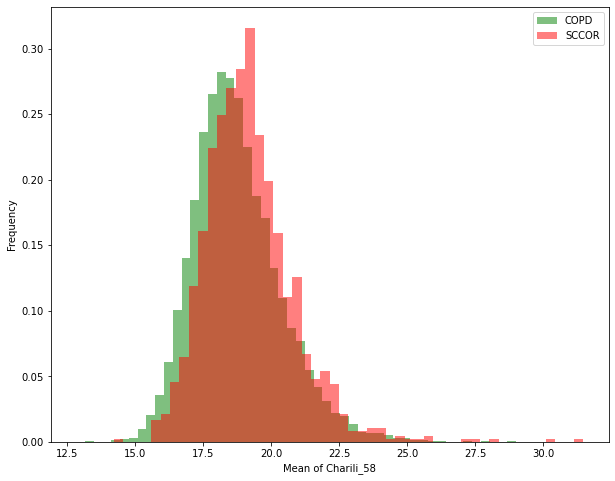

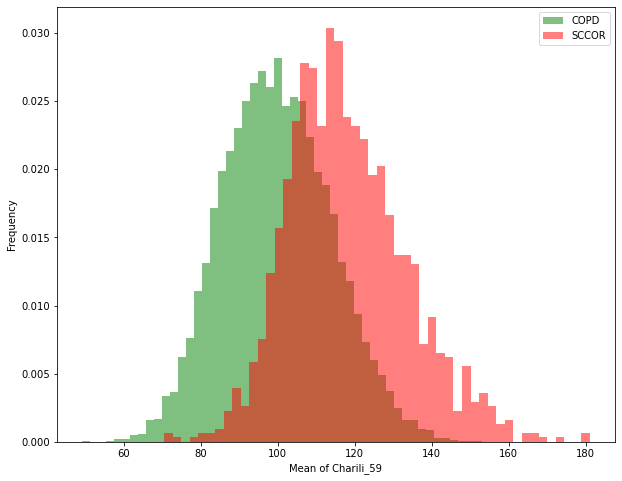

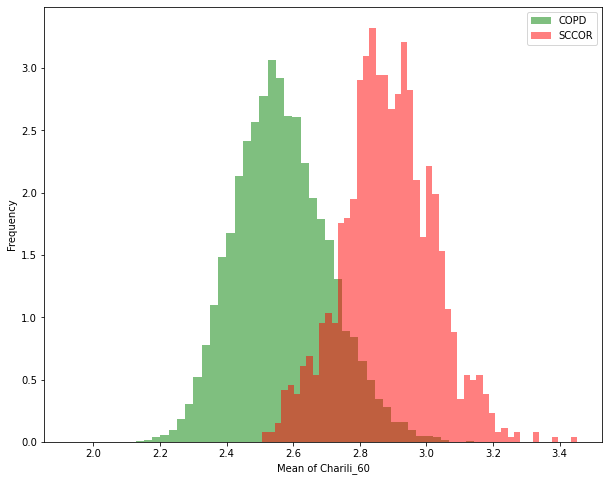

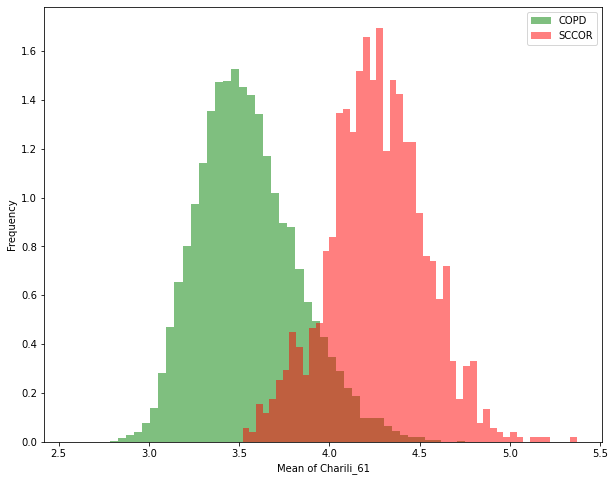

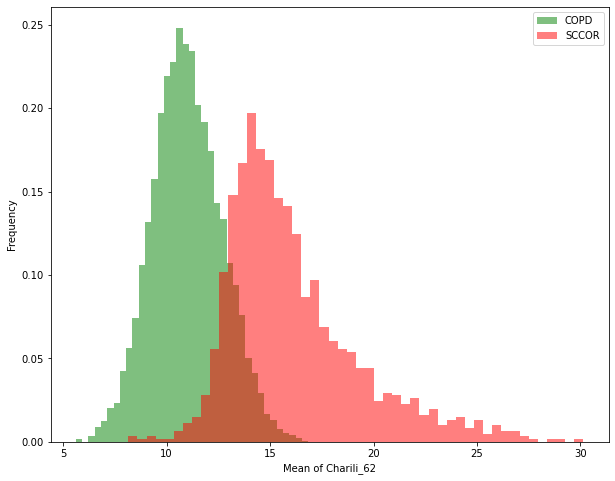

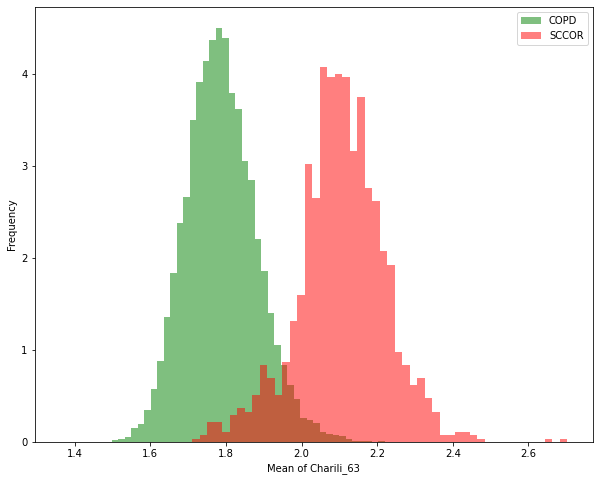

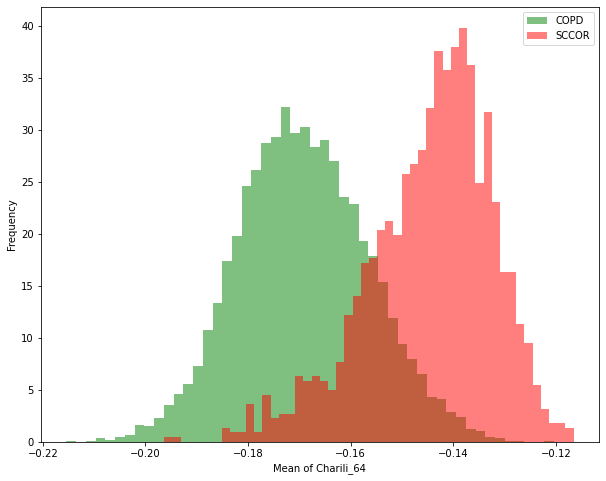

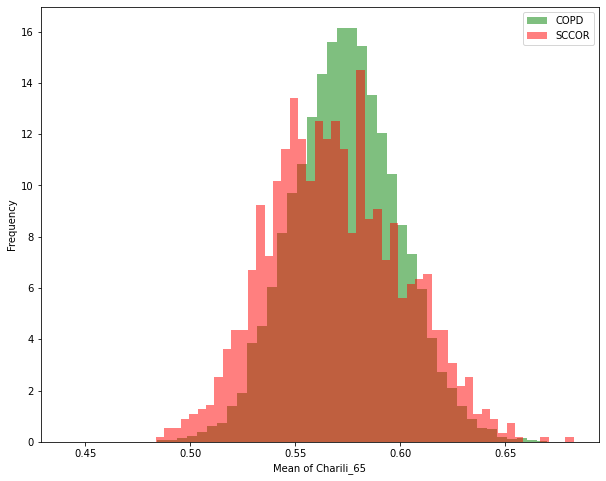

In [28]:
for i in range(1, 66):
    plt.hist(df_haralick[df_haralick['Dataset'] == 'COPD']['Charili_'+str(i)], label="COPD", alpha=0.5, color="green", density=True, bins=50)
    plt.hist(df_haralick[df_haralick['Dataset'] == 'SCCOR']['Charili_'+str(i)], label="SCCOR", alpha=0.5, color="red", density=True, bins=50)
    plt.xlabel('Mean of Charili_'+str(i))
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


### Outliers

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
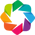

In [4]:
import sys
sys.path.append('/pylon5/ac5616p/debdas/pyviz_med')
import seaborn as sns
import holoviews as hv
plt.rcParams['figure.figsize'] = (10,8)
hv.extension('bokeh')

from pyviz_med.visual import PyPatient
from pyviz_med.visual import PyCohort

In [8]:
%%capture --no-display
nifti_img_path = '/pghbio/dbmi/batmanlab/chirayu/Data/COPDGene/Test_Reproducing_Phase-1_Images/16233H/Phase-1/Isotropic/16233H_INSP_STD_HAR_COPD_BSpline_Iso1.0mm.nii.gz'
patient_SCCOR = PyPatient(path=nifti_img_path, subject_id='XXXX')
# Display the patient object
patient_SCCOR.view(plane='coronal', three_planes=False, dynamic=True, image_size=400)



Row
    [0] WidgetBox
        [0] Select(margin=(20, 20, 5, 20), name='subject_id', options=['XXXX'], value='XXXX', width=250)
        [1] DiscreteSlider(formatter='%d', margin=(5, 20, 20, 20), name='y', options=OrderedDict([('0', ...]), value=0, width=250)
        [2] RangeSlider(end=4088.86201171875, name='contrast', start=-4544.91181640625, value=(-3024.9638671875, ...)
    [1] HoloViews(GridSpace)

In [9]:
%%capture --no-display
nifti_img_path = '/pylon5/ac5616p/debdas/SCCORProcessing/nifti/1-0166-2/Date_20100821/002/002_Iso1.0mm.nii.gz'
patient_SCCOR = PyPatient(path=nifti_img_path, subject_id='XXXXX')
# Display the patient object
patient_SCCOR.view(plane='coronal', three_planes=False, dynamic=True, image_size=400)

Row
    [0] WidgetBox
        [0] Select(margin=(20, 20, 5, 20), name='subject_id', options=['XXXXX'], value='XXXXX', width=250)
        [1] DiscreteSlider(formatter='%d', margin=(5, 20, 20, 20), name='y', options=OrderedDict([('0', ...]), value=0, width=250)
        [2] RangeSlider(end=4908.48046875, name='contrast', start=-4733.548828125, value=(-3024.92333984375, ...)
    [1] HoloViews(GridSpace)